In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import *
import glob
import pandas as pd
from matplotlib.lines import Line2D
markers=list(Line2D.markers)
import seaborn as sns
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stixsans'
from matplotlib.ticker import AutoMinorLocator
#plotting parameters to make presentable plots
#sns.set(font_scale=1.25,style='white', palette='deep')#,rc = {'figure.figsize':(10,5)})#,font_style='bold') # font='SF Hello'

### Load Data

In [2]:
files = glob.glob('../COMSOL Simulation - THG SiMS/240228-AsymmetrySweep_Qnr=150/Data/*.xlsx')
#files = glob.glob('Loss =150/Data/*.xlsx')

In [89]:
files

['../COMSOL Simulation - THG SiMS/240228-AsymmetrySweep_Qnr=150/Data\\240228-x_pol_S1=000nm_Qnr=150.xlsx',
 '../COMSOL Simulation - THG SiMS/240228-AsymmetrySweep_Qnr=150/Data\\240228-x_pol_S1=050nm_Qnr=150.xlsx',
 '../COMSOL Simulation - THG SiMS/240228-AsymmetrySweep_Qnr=150/Data\\240228-x_pol_S1=100nm_Qnr=150.xlsx',
 '../COMSOL Simulation - THG SiMS/240228-AsymmetrySweep_Qnr=150/Data\\240228-x_pol_S1=110nm_Qnr=150.xlsx',
 '../COMSOL Simulation - THG SiMS/240228-AsymmetrySweep_Qnr=150/Data\\240228-x_pol_S1=120nm_Qnr=150.xlsx',
 '../COMSOL Simulation - THG SiMS/240228-AsymmetrySweep_Qnr=150/Data\\240228-x_pol_S1=130nm_Qnr=150.xlsx',
 '../COMSOL Simulation - THG SiMS/240228-AsymmetrySweep_Qnr=150/Data\\240228-x_pol_S1=140nm_Qnr=150.xlsx',
 '../COMSOL Simulation - THG SiMS/240228-AsymmetrySweep_Qnr=150/Data\\240228-x_pol_S1=150nm_Qnr=150.xlsx',
 '../COMSOL Simulation - THG SiMS/240228-AsymmetrySweep_Qnr=150/Data\\240228-x_pol_S1=160nm_Qnr=150.xlsx',
 '../COMSOL Simulation - THG SiMS/240

In [3]:
data_list = []
S1_list = []

for i in range(len(files)):
    data = pd.read_excel(files[i],index_col=None)#,usecols=range(8))
    # S1 = int(files[i].split('=')[-1][:-7])
    # S1 = int(files[i].split('_')[-2][3:6])
    # data['S1_nm'] = S1
    # data['Qnr'] = 999
    data_list.append(data)
    # 1_list.append(S1)
    # filename=files[i].split('\\')[1]
    # data.to_excel('Data/'+filename,index=False)
    print(len(data.columns))
main_df = pd.concat(data_list)

S1_list=list(set(main_df['S1_nm']))
S1_list.sort()

10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10


In [4]:
main_df

,THGWavelength_nm,THG_Forward,THG_Backward,PumpWavelength_nm,LinearTransmission,LinearReflection,RFE_Pump,RFE_THG,S1_nm,Qnr,Unnamed: 0
0,466.666667,8.531005e-10,3.404942e-11,1400.0,0.142803,0.760571,3.1858,0.001315,0,150,NaN
1,468.333333,6.175475e-10,4.311027e-11,1405.0,0.136599,0.764591,3.1549,0.001299,0,150,NaN
2,470.000000,1.792324e-10,1.469904e-10,1410.0,0.127177,0.771076,3.1955,0.001378,0,150,NaN
3,471.666667,4.412596e-10,2.534674e-12,1415.0,0.117248,0.778033,3.1820,0.001510,0,150,NaN
4,473.333333,2.753537e-09,1.530794e-10,1420.0,0.109078,0.781133,3.2074,0.001813,0,150,NaN
...,...,...,...,...,...,...,...,...,...,...,...
36,560.000000,1.158081e-09,2.482438e-11,1680.0,0.461753,0.487671,2.0154,0.000253,999,150,NaN
37,561.666667,1.623692e-09,2.561064e-11,1685.0,0.470865,0.478002,2.0519,0.000269,999,150,NaN
38,563.333333,1.742924e-09,3.388444e-12,1690.0,0.480581,0.467767,2.0530,0.000309,999,150,NaN
39,565.000000,2.064259e-09,1.461856e-11,1695.0,0.491104,0.456699,2.0356,0.000322,999,150,NaN


### Plot raw data

Text(0, 0.5, 'Transmission (Arb. Units)')

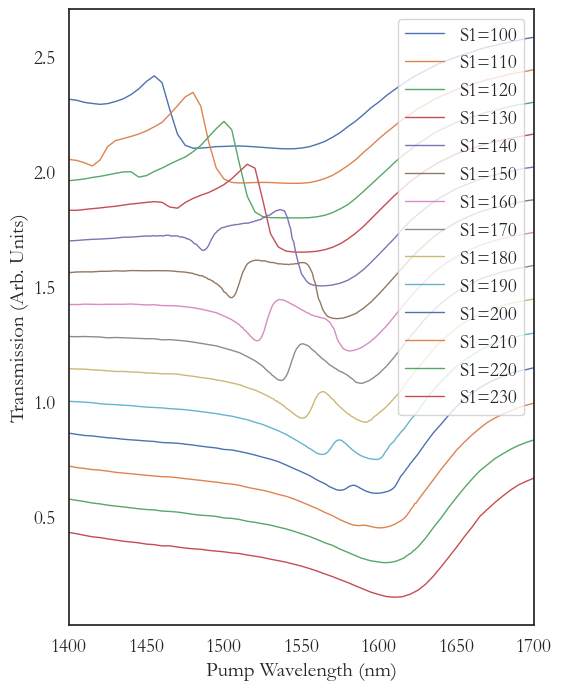

In [23]:
plt.figure(figsize=(6,8))
sns.set(font_scale=1.25,style='white', palette='deep',font='Garamond')

spacing = 0.15
for i in range(len(S1_list)):
    if S1_list[i] in [0,50,999]:
        continue
    else:
        sub_df = main_df[main_df['S1_nm']==S1_list[i]]
        stack_sep = spacing*(len(S1_list)-1-i)
        plt.plot(sub_df['PumpWavelength_nm'],sub_df['LinearTransmission']+stack_sep,label='S1=%d' %((S1_list[i]) ),#label=r'%snm ($\alpha$=%0.2f)' %(S1_list[i],(230-S1_list[i])/230 ),
                 linewidth=1,marker='none',fillstyle='none',markersize=4)
plt.legend(loc=1)
plt.xlim(1400,1700)
plt.xlabel('Pump Wavelength (nm)')
plt.ylabel('Transmission (Arb. Units)')
# plt.savefig('COMSOL Simualtion Data/240206-AsymmetrySweep/Transmisssion.png',dpi=200)

<Figure size 700x1000 with 0 Axes>

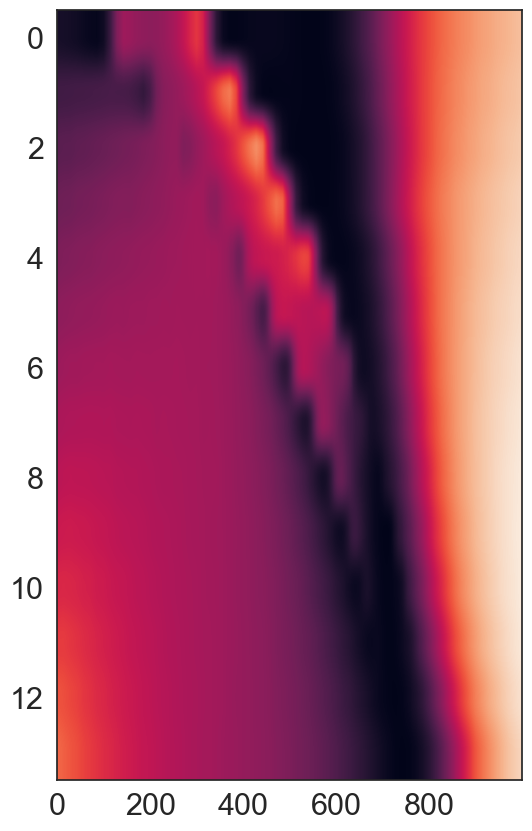

In [113]:
from scipy.interpolate import interp1d

plt.figure(figsize=(7,10))
sns.set(font_scale=2,style='white', palette='deep',font='Arial')
spacing = 0.75
array_2d=[]
fixed_wl_range=np.linspace(1350,1700,1000)
for i in range(len(S1_list)):
    if S1_list[i] in [0,50,999]:
        continue
    else:
        sub_df = main_df[main_df['S1_nm']==S1_list[i]]
        
        f_refl = interp1d(sub_df['PumpWavelength_nm'], sub_df['LinearTransmission'],fill_value='extrapolate')
        ref_refl_interp = f_refl(fixed_wl_range)

        array_2d.append(np.array(ref_refl_interp))

plt.figure(figsize=(6,10))
plt.imshow(array_2d,aspect='auto',interpolation=None)

Text(0, 0.5, 'Reflection (Arb. Units)')

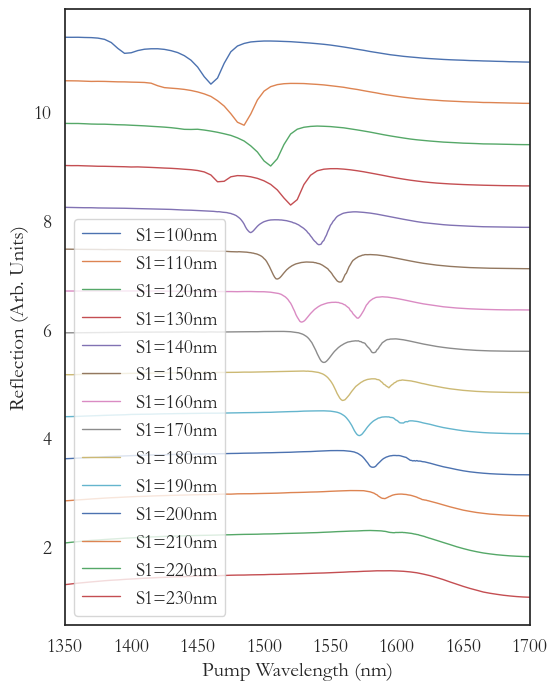

In [22]:
#plt.figure(figsize=(7,12))
plt.figure(figsize=(6,8))
sns.set(font_scale=1.25,style='white', palette='deep',font='Garamond')
spacing = 0.75
for i in range(len(S1_list)):
    if S1_list[i] in [0,50,999]:
        continue
    else:
        sub_df = main_df[main_df['S1_nm']==S1_list[i]]
        stack_sep = spacing*(len(S1_list)-1-i)
        plt.plot(sub_df['PumpWavelength_nm'],sub_df['LinearReflection']+stack_sep,label='S1=%dnm' %(S1_list[i]),
                 marker='none',fillstyle='none',markersize=2, linewidth=1)
        #plt.text(1600,sub_df['LinearReflection'].i+stack_sep,'123')
plt.legend(loc=3)#,fontsize=10)
plt.xlim(1350,1700)
#plt.ylim(0,13)
plt.xlabel('Pump Wavelength (nm)')
plt.ylabel('Reflection (Arb. Units)')

# plt.savefig('COMSOL Simualtion Data/240206-AsymmetrySweep/Reflection.png',dpi=200)

In [19]:
from scipy.interpolate import interp1d

plt.figure(figsize=(7,10))
sns.set(font_scale=2,style='white', palette='deep',font='Arial')
spacing = 0.75
array_2d=[]
fixed_wl_range=np.linspace(1350,1700,1000)
for i in range(len(S1_list)):
    if S1_list[i] in [0,50,999]:
        continue
    else:
        sub_df = main_df[main_df['S1_nm']==S1_list[i]]
        
        f_refl = interp1d(sub_df['PumpWavelength_nm'], sub_df['LinearReflection'],fill_value='extrapolate')
        ref_refl_interp = f_refl(fixed_wl_range)

        array_2d.append(np.array(ref_refl_interp))
#plt.legend(loc=3)
#plt.xlim(1350,1700)
#plt.xlabel('Pump Wavelength (nm)')
#plt.ylabel('Reflection (Arb. Units)')

<Figure size 700x1000 with 0 Axes>

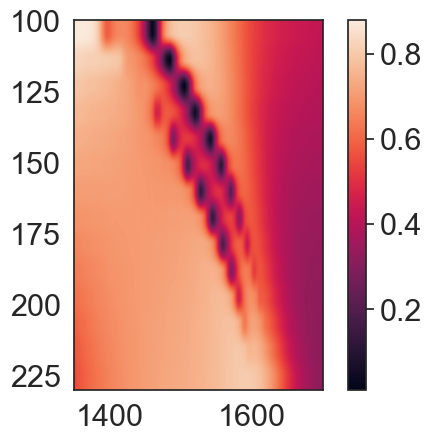

In [20]:
#plt.figure(figsize=(6,8))
plt.imshow(array_2d,aspect=4
           ,interpolation=None,extent=[1350,1700,230,100])
plt.colorbar()

Text(0, 0.5, 'Relative Field Enhancement (Arb. Units)')

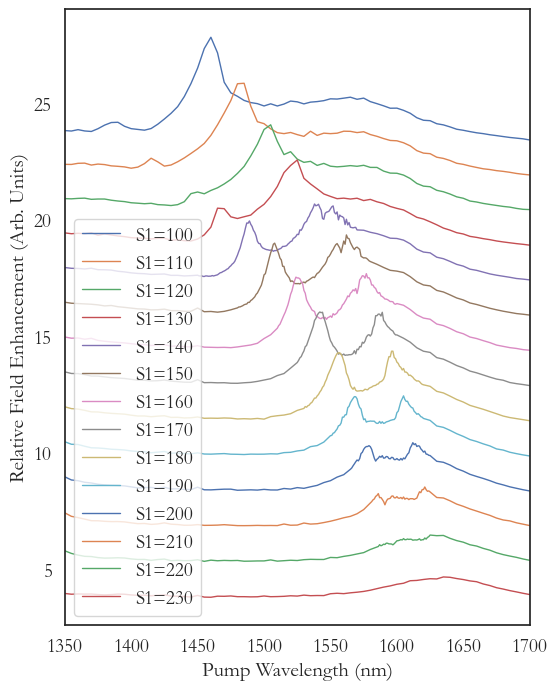

In [24]:
plt.figure(figsize=(6,8))
sns.set(font_scale=1.25,style='white', palette='deep',font='Garamond')
spacing = 1.5
for i in range(len(S1_list)):
    if S1_list[i] in [0,50,999]:
        continue
    else:
        sub_df = main_df[main_df['S1_nm']==S1_list[i]]
        stack_sep = spacing*(len(S1_list)-1-i)
        plt.plot(sub_df['PumpWavelength_nm'],sub_df['RFE_Pump']+stack_sep,label='S1=%d' %(S1_list[i]),
                 linewidth=1,marker='none',fillstyle='none',markersize=3, )
plt.legend(loc=3)
plt.xlim(1350,1700)
plt.xlabel('Pump Wavelength (nm)')
plt.ylabel('Relative Field Enhancement (Arb. Units)')
# plt.savefig('COMSOL Simualtion Data/240206-AsymmetrySweep/RelEnhancement.png',dpi=200)

Text(0, 0.5, 'Relative Field Enhancement (Arb. Units)')

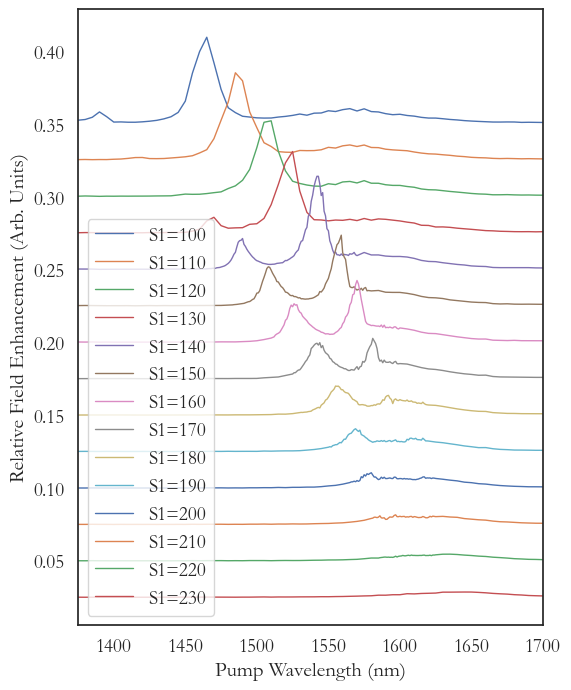

In [25]:
plt.figure(figsize=(6,8))
sns.set(font_scale=1.25,style='white', palette='deep',font='Garamond')
spacing = 0.025
for i in range(len(S1_list)):
    if S1_list[i] in [0,50,999]:
        continue
    else:
        sub_df = main_df[main_df['S1_nm']==S1_list[i]]
        stack_sep = spacing*(len(S1_list)-1-i)
        plt.plot(sub_df['PumpWavelength_nm'],sub_df['RFE_THG']+stack_sep,label='S1=%d' %((S1_list[i]) ),
                 linewidth=1,marker='none',fillstyle='none',markersize=3, )
plt.legend(loc=3)
plt.xlim(1375,1700)
plt.xlabel('Pump Wavelength (nm)')
plt.ylabel('Relative Field Enhancement (Arb. Units)')
# plt.savefig('COMSOL Simualtion Data/240206-AsymmetrySweep/RelEnhancement.png',dpi=200)

Text(0, 0.5, 'THG Intensity (Forward) (Wcm$^{-2}$)')

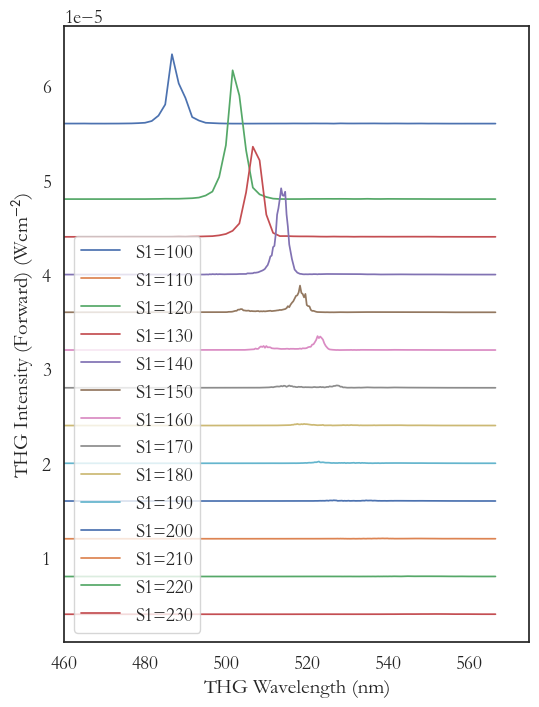

In [26]:
plt.figure(figsize=(6,8))
spacing=4e-6
for i in range(len(S1_list)):
    sub_df = main_df[main_df['S1_nm']==S1_list[i]]
    stack_sep = spacing*(len(S1_list)-1-i)
    if S1_list[i] in [0,50,999]:
        continue
    else:
        plt.plot(sub_df['THGWavelength_nm'],sub_df['THG_Forward']+stack_sep,label='S1=%d' %((S1_list[i]) ),
                 linewidth=1.25,marker='none',fillstyle='none',markersize=3, )
plt.legend(loc=3)
plt.xlim(460,575)
plt.xlabel('THG Wavelength (nm)')
plt.ylabel(r'THG Intensity (Forward) (Wcm$^{-2}$)')
#plt.savefig('COMSOL Simualtion Data/240206-AsymmetrySweep/THG_Forward.png',dpi=200)

Text(0, 0.5, 'THG Intensity (Backward) (Wcm$^{-2}$)')

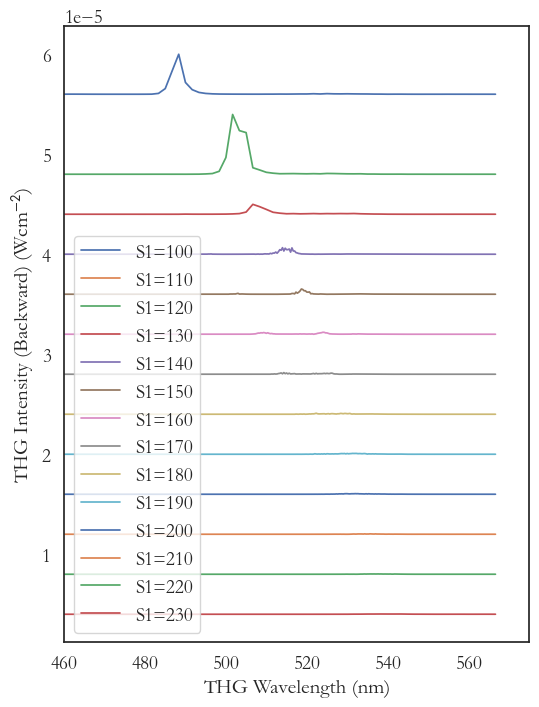

In [27]:
plt.figure(figsize=(6,8))
spacing=4e-6
for i in range(len(S1_list)):
    sub_df = main_df[main_df['S1_nm']==S1_list[i]]
    stack_sep = spacing*(len(S1_list)-1-i)
    if S1_list[i] in [0,50,999]:
        continue
    else:
        plt.plot(sub_df['THGWavelength_nm'],sub_df['THG_Backward']+stack_sep,label='S1=%d' %((S1_list[i]) ),
                 linewidth=1.25,marker='none',fillstyle='none',markersize=3, )
plt.legend(loc=3)
plt.xlim(460,575)
plt.xlabel('THG Wavelength (nm)')
plt.ylabel(r'THG Intensity (Backward) (Wcm$^{-2}$)')
#plt.savefig('COMSOL Simualtion Data/240206-AsymmetrySweep/THG_Forward.png',dpi=200)

### Fano/Lorentzian Fitting

In [62]:
from scipy.optimize import curve_fit

In [63]:
def fano(wl,wl0,gamma0,q,TA,Tnr):
    omega = 2*pi*c/wl
    omega0=2*pi*c/wl0
    domega=(omega-omega0)/gamma0
    return TA/(1+q**2) * (q+domega)**2 / (1+domega**2) + Tnr*wl**2

def fano_omega(omega,omega0,gamma0,q,TA,Tnr):
    omega = 2*pi*c/wl
    omega0=2*pi*c/wl0
    domega=(omega-omega0)/gamma0
    return TA/(1+q**2) * (q+domega)**2 / (1+domega**2)

def fano2(wl,wl0,wl02,gamma0,gamma02,q,q2,TA,TA2,Tnr):
    omega = 2*pi*c/wl
    omega0=2*pi*c/wl0
    domega=(omega-omega0)/gamma0
    
    omega2 = 2*pi*c/wl
    omega02=2*pi*c/wl02
    domega2=(omega2-omega02)/gamma02
    
    return TA/(1+q**2) * (q+domega)**2 / (1+domega**2) + TA2/(1+q2**2) * (q2+domega2)**2 / (1+domega2**2) + Tnr


def lorentzian(wl,wl0,gamma0,A,B):
    #omega = 2*pi*c/wl
    #omega0=2*pi*c/wl0
    return -A * (0.5*gamma0/((wl-wl0)**2 + (0.5*gamma0**2))) + B

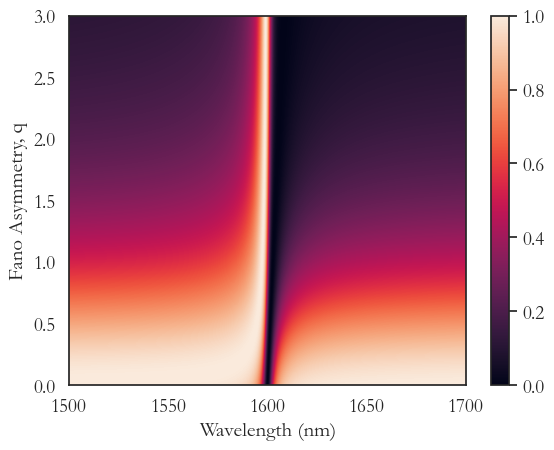

In [65]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()

x1, x2 = np.meshgrid(np.linspace(1500,1700,500), np.linspace(0,3,500))
y = fano(x1,1600,2000,x2,1,0)

plt.imshow(y,extent=[1500,1700,0,3],origin='lower',aspect='auto')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Fano Asymmetry, q')
plt.colorbar()

In [66]:
from scipy.interpolate import interp1d
from scipy import sparse
from scipy.sparse.linalg import spsolve

def baseline_als(y, lam, p, niter=50):
  L = len(y)
  D = sparse.csc_matrix(np.diff(np.eye(L), 2))
  w = np.ones(L)
  for i in range(niter):
    W = sparse.spdiags(w, 0, L, L)
    Z = W + lam * D.dot(D.transpose())
    z = spsolve(Z, w*y)
    w = p * (y > z) + (1-p) * (y < z)
  return z
  
def normalize(y_data,lam=10**7,p=0.6):
    y_baseline=baseline_als(y_data,lam,p)
    return y_data-y_baseline

def calc_fit_error(errfunc,optim,pcov,xdata,ydata,guess):
    if (len(ydata) > len(guess)) and pcov is not None:
        s_sq = (errfunc(optim, xdata, ydata)**2).sum()/(len(ydata)-len(guess))
        pcov = pcov * s_sq
    else:
        pcov = np.inf

    error = [] 
    for i in range(len(optim)):
        try:
          error.append(np.absolute(pcov[i][i])**0.5)
        except:
          error.append( 0.00 )
    return np.array(error)   


def calc_Q_error(optim,fit_err):
    Q = optim[0]/optim[1]
    dQ = Q*np.sqrt( (fit_err[0]/optim[0])**2 + (fit_err[1]/optim[1])**2)
    return dQ

In [67]:
  
    

# Data to be fit

bounded = False
wl_start=1560
wl_end=1600

sub_df = main_df[main_df['S1_nm']==160]
if bounded == True:
    sub_df = sub_df[(sub_df['PumpWavelength_nm']>wl_start) & (sub_df['PumpWavelength_nm']<wl_end)]
wl_range = np.array(sub_df['PumpWavelength_nm'])
transmission = np.array(sub_df['LinearTransmission']) 
reflection = np.array(sub_df['LinearReflection']) 

# Reference baseline data 
sub_df_ref = main_df[main_df['S1_nm']==230]
if bounded == True:
    sub_df_ref = sub_df_ref[(sub_df_ref['PumpWavelength_nm']>wl_start) & (sub_df_ref['PumpWavelength_nm']<wl_end)]
wl_range_ref=np.array(sub_df_ref['PumpWavelength_nm'])
ref_transmission = np.array(sub_df_ref['LinearTransmission'])
ref_reflection = np.array(sub_df_ref['LinearReflection'])

# Interpolate reference data to experimental data
f_trans = interp1d(wl_range_ref, ref_transmission,fill_value='extrapolate')
f_refl = interp1d(wl_range_ref, ref_reflection,fill_value='extrapolate')
ref_trans_interp = f_trans(wl_range)
ref_refl_interp = f_refl(wl_range)


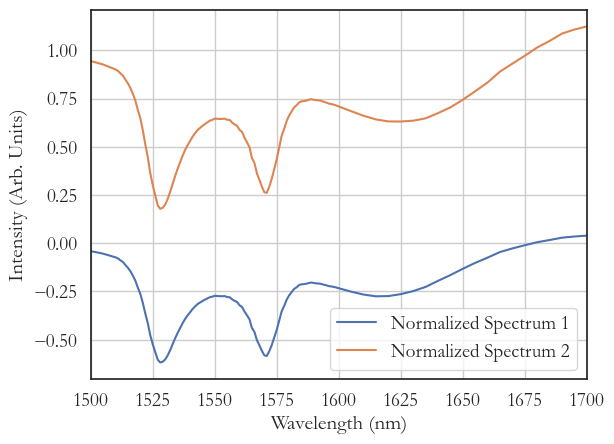

In [68]:
# Background subtract interpolated reference data
norm_trans = transmission-ref_trans_interp
norm_refl = reflection-ref_refl_interp
norm_ref2 = reflection/ref_refl_interp

#plt.plot(wl_range,reflection,'o-',label='Raw Spectrum',fillstyle='none')
#plt.plot(wl_range,ref_refl_interp,label=r'Baseline ($\alpha=0$)')
plt.plot(wl_range,norm_refl,label='Normalized Spectrum 1')
plt.plot(wl_range,norm_ref2,label='Normalized Spectrum 2')
#plt.plot(wl_range,fano2(wl_range, 1559,  1595,  2490, 1000, -1.0, 5,  0.4, 0.2,0),label='Fit')
#plt.plot(wl_range,lorentzian(wl_range,1581.5,5,4,0),label='Lorentzian')
plt.xlim(1500,1700)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (Arb. Units)')
plt.grid()
plt.legend()

[1.55296107e+03 9.23362593e+01 5.32489286e+01 1.39027562e-01]
Q-factor: 16 $\pm$ 3.26
[ 1.96257236 17.88946411 19.24209469  0.10662433]


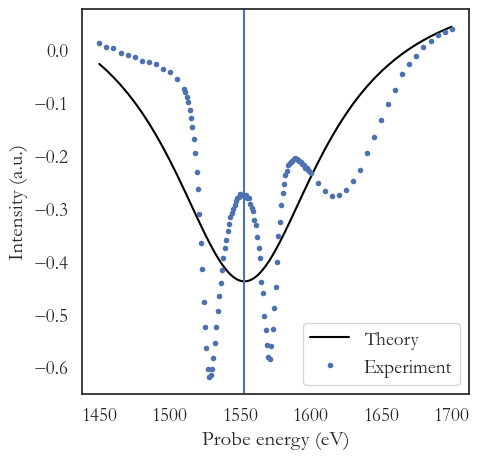

In [69]:
from scipy.optimize import leastsq,least_squares,minimize

errfunc = lambda p,x,y: np.abs(lorentzian(x,*p)-y)**2
guess1=[1560,100,0.17,0.9,0]
guess2=[1575,1610,2561,500,0.38,1.0,0.88,0.57,-1.32]
guess_lo=[1581,2000,2000,0]
optim, pcov,infodict,mesg,ier = leastsq(errfunc, guess_lo[:], args=(wl_range, norm_refl),full_output=True)
# optim, pcov = minimize(errfunc, guess2[:], args=(wl_range, norm_trans),method='SLSQP')#,constraints={[1550,1575],[1580,1610],[0,np.inf],[0,np.inf],[0,2],[0,2],[0,np.inf],[0,np.inf],[-np.inf,np.inf]})

fit_err = calc_fit_error(errfunc,optim,pcov,wl_range,norm_refl,guess_lo)
dQ = calc_Q_error(optim,fit_err)

#xx=np.linspace(1.44,2.0,1000)
plt.figure(figsize=(5,5))
plt.plot(wl_range,lorentzian(wl_range,*optim),label='Theory',color='black')
plt.plot(wl_range,norm_refl,'o',label='Experiment',markersize=3.0)#,edgecolors='black')
plt.axvline(optim[0])
plt.xlabel('Probe energy (eV)')
plt.ylabel('Intensity (a.u.)')
#plt.gca().set_yticklabels(['']*10)
plt.legend(loc='best')
print(optim)
print(r'Q-factor: %d $\pm$ %0.2f' %(optim[0]/optim[1],dQ))
print(fit_err)

In [70]:

def fano_fit(sub_df,sub_df_ref,guess2):
    wl_range = np.array(sub_df['PumpWavelength_nm'])
    transmission = np.array(sub_df['LinearTransmission ']) 
    reflection = np.array(sub_df['LinearReflection']) 

    # Reference baseline data 
    wl_range_ref=np.array(sub_df_ref['PumpWavelength_nm'])
    ref_transmission = np.array(sub_df_ref['LinearTransmission '])
    ref_reflection = np.array(sub_df_ref['LinearReflection'])

    # Interpolate reference data to experimental data
    #f = interp1d(wl_range_ref, ref_transmission,fill_value='extrapolate')
    #ref_trans_interp = f(wl_range)
    
    f2 = interp1d(wl_range_ref, ref_transmission,fill_value='extrapolate')
    ref_trans_interp = f(wl_range)

    # Background subtract interpolated reference data
    norm_trans = transmission-ref_trans_interp
    
    errfunc = lambda p,x,y: (fano(x,*p)-y)**2
    # guess1=[1550,2899,0.17,0.9,0]
    # guess2=[1557,1592,2561,1398,0.38,0.49,0.88,0.57,-1.32]
    optim, success,infodict,mesg,ier = leastsq(errfunc, guess2[:], args=(wl_range, norm_trans),full_output=True)
    
    plt.plot(c/wl_range,fano(wl_range,*optim),label='Theory',color='black')
    plt.plot(c/wl_range,norm_trans,'o',label='Experiment',markersize=3.0)#,edgecolors='black')
    # plt.plot(wl_range,fano2(wl_range,1558,2899,0.17,0.9,0.9, 1.59898359e+03,  6.90351242e+04,  2.53265622e+00,0.9, 0.9))
    #plt.xlim(1.47,1.86)
    #plt.ylim(-0.5,0.5)
    #plt.title('Peak1=%d, Gamma1=%d, Q1=%d, q1=%0.1f, TA1=%0.1f \n Peak2=%d, Gamma2=%d, Q2=%d, q2=%0.1f, TA2=%0.1f' 
    #          %(optim[0],optim[2],(optim[0])/optim[2],optim[4],optim[6],optim[1],optim[3],(optim[1])/optim[3],optim[5],optim[7]))
    plt.xlabel('Probe energy (eV)')
    plt.ylabel('Intensity (a.u.)')
    #plt.gca().set_yticklabels(['']*10)
    plt.legend(loc='best')
    plt.show()
    

def lorentzian_fit(sub_df,sub_df_ref,guess,wl_start,wl_end):
    
    sub_df = sub_df[(sub_df['PumpWavelength_nm']>wl_start) & (sub_df['PumpWavelength_nm']<wl_end)]
    sub_df_ref = sub_df_ref[(sub_df_ref['PumpWavelength_nm']>wl_start) & (sub_df_ref['PumpWavelength_nm']<wl_end)]

    wl_range = np.array(sub_df['PumpWavelength_nm'])
    transmission = np.array(sub_df['LinearTransmission']) 
    reflection = np.array(sub_df['LinearReflection']) 

    # Reference baseline data 
    wl_range_ref=np.array(sub_df_ref['PumpWavelength_nm'])
    #ref_transmission = np.array(sub_df_ref['LinearTransmission'])
    ref_reflection = np.array(sub_df_ref['LinearReflection'])

    # Interpolate reference data to experimental data
    #f_trans = interp1d(wl_range_ref, ref_transmission,fill_value='extrapolate')
    #ref_trans_interp = f_trans(wl_range)
    
    #f_refl = interp1d(wl_range_ref, ref_reflection,fill_value='extrapolate')
    #ref_refl_interp = f_refl(wl_range)

    # Background subtract interpolated reference data
    #norm_trans = transmission-ref_trans_interp
    norm_refl = reflection #/ref_refl_interp

    # Background subtract interpolated reference data
    #norm_trans = transmission-ref_trans_interp
    norm_refl = reflection#-ref_refl_interp
    
    errfunc = lambda p,x,y: (lorentzian(x,*p)-y)**2
    # guess1=[1550,2899,0.17,0.9,0]
    # guess2=[1557,1592,2561,1398,0.38,0.49,0.88,0.57,-1.32]
    optim, pcov,infodict,mesg,ier = leastsq(errfunc, guess[:], args=(wl_range, norm_refl),full_output=True)
    fit_err = calc_fit_error(errfunc,optim,pcov,wl_range,norm_refl,guess)
    dQ = calc_Q_error(optim,fit_err)
    
    print(optim)
    print(fit_err)

    plt.figure(figsize=(4,4))
    plt.title(r'$\lambda_0$=%0d, $\delta \lambda$ = %0.1f, Q=%d (%d)' %(optim[0], optim[1],optim[0]/optim[1],dQ))
    plt.plot(wl_range,lorentzian(wl_range,*optim),label='Lorentzian Fit',color='black')
    plt.plot(wl_range,norm_refl,'o',label='Experiment',markersize=3.0,fillstyle='none')#,edgecolors='black')
    plt.axvline(optim[0],linestyle='--',alpha=0.5)
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity (a.u.)')
    #plt.gca().set_yticklabels(['']*10)
    plt.legend(loc='best')
    plt.show()


### Individual Fits

#### S1 = 220nm

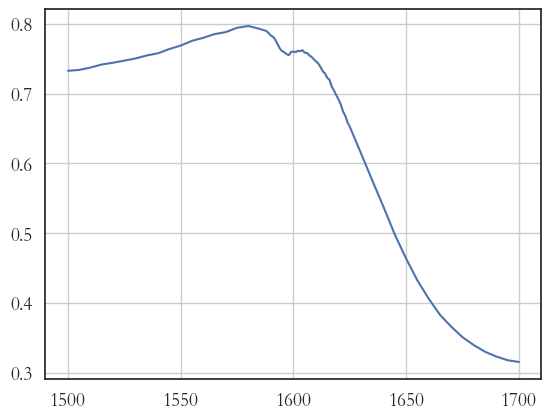

In [154]:
sub_df = main_df[main_df['S1_nm']==220]
sub_df_ref = main_df[main_df['S1_nm']==230]
plt.plot(sub_df['PumpWavelength_nm'],sub_df['LinearReflection'])
plt.grid()

[1.59797738e+03 5.41572695e+01 2.72239468e+01 4.57249505e-01]
[0. 0. 0. 0.]


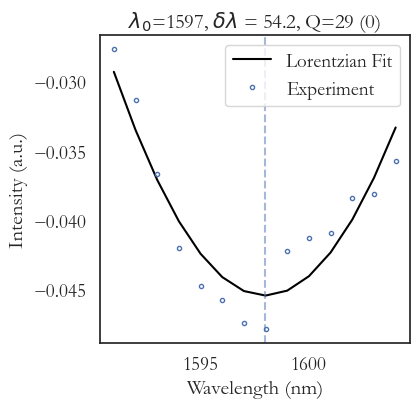

[1.59803486e+03 5.30389837e+01 3.18075703e+01 1.54314126e+00]
[0. 0. 0. 0.]


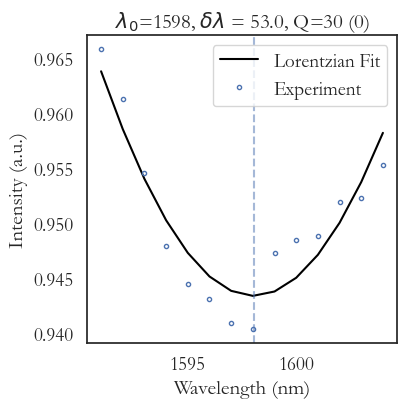

In [156]:
guess1=[1595,2.382,1.411,0.02]
lorentzian_fit(sub_df,sub_df_ref,guess1,1590,1605)
lorentzian_fit2(sub_df,sub_df_ref,guess1,1590,1605)

#### S1 = 210nm

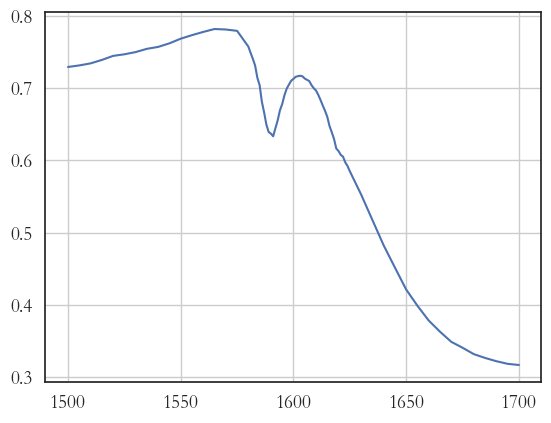

In [97]:
sub_df = main_df[main_df['S1_nm']==210]
sub_df_ref = main_df[main_df['S1_nm']==230]
plt.plot(sub_df['PumpWavelength_nm'],sub_df['LinearReflection'])
plt.grid()

[1.59111133e+03 1.41797401e+01 3.00667872e+00 4.78538317e-02]
[0.11428679 2.0784416  0.89895074 0.0342386 ]


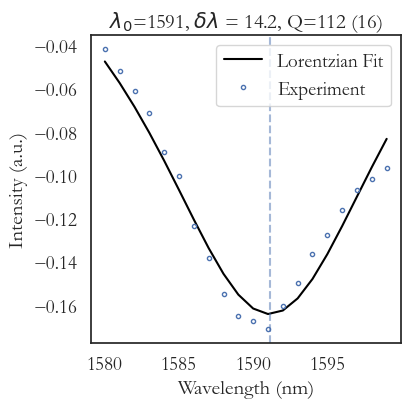

In [98]:
guess1=[1590,2.382,1.411,0.02]
lorentzian_fit(sub_df,sub_df_ref,guess1,1575,1600)

#guess2=[1620,2,1.411,0.02]
#lorentzian_fit(sub_df,sub_df_ref,guess2,1610,1630)

In [186]:
1589/2.5

635.6

In [190]:
nu0

635.5999999999999

#### S1 = 200nm

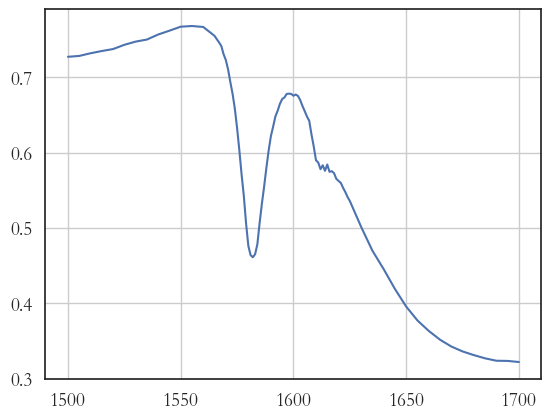

In [99]:
sub_df = main_df[main_df['S1_nm']==200]
sub_df_ref = main_df[main_df['S1_nm']==230]
plt.plot(sub_df['PumpWavelength_nm'],sub_df['LinearReflection'])
plt.grid()

[ 1.58267055e+03  7.79923596e+00  2.24507678e+00 -6.90398918e-02]
[0.19250118 0.7205921  0.23519976 0.00916265]


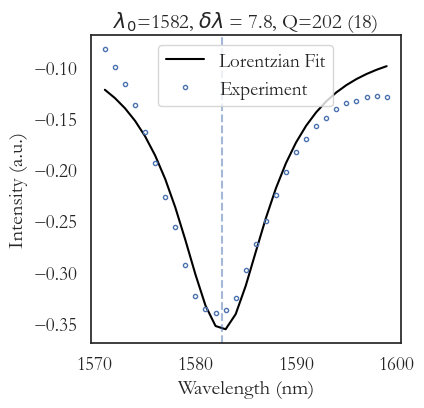

[1614.34145107   85.11383117  205.38738508    2.21709681]
[0. 0. 0. 0.]


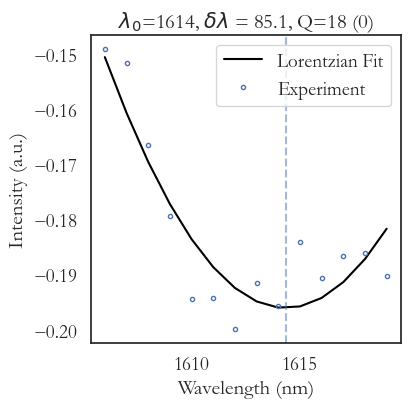

In [100]:
guess1=[1580,2.382,1.411,0.02]
lorentzian_fit(sub_df,sub_df_ref,guess1,1570,1600)
guess2=[1610,2,1.411,0.02]
lorentzian_fit(sub_df,sub_df_ref,guess2,1605,1620)

#### S1 = 190nm

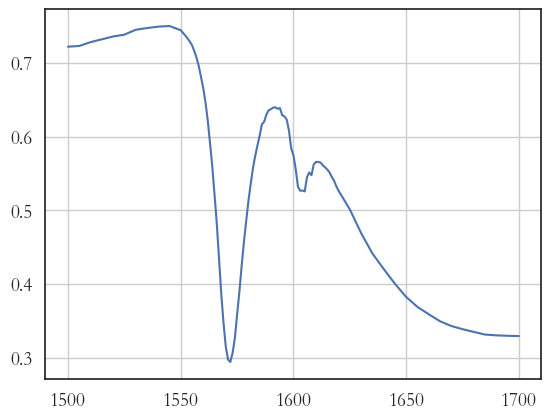

In [101]:
sub_df = main_df[main_df['S1_nm']==190]
sub_df_ref = main_df[main_df['S1_nm']==230]
plt.plot(sub_df['PumpWavelength_nm'],sub_df['LinearReflection'])
plt.grid()

[ 1.57311801e+03  1.20585730e+01  5.80471145e+00 -1.14709257e-02]
[0.17544526 1.21570618 0.72703147 0.02220716]


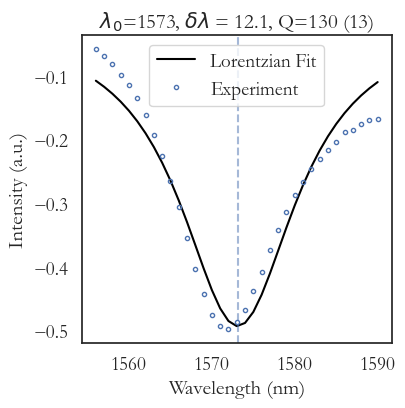

[ 1.60433345e+03  5.03443730e+00  4.71298307e-01 -1.85156274e-01]
[0.25528277 1.1609996  0.10582456 0.00651729]


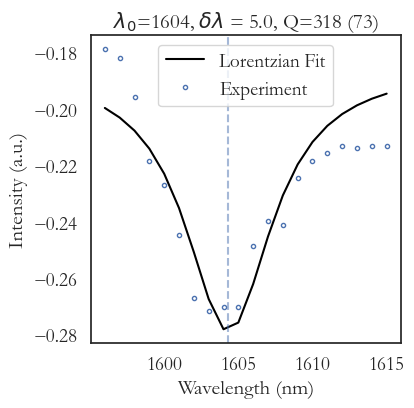

In [103]:
guess1=[1570,2.382,1.411,0.02]
lorentzian_fit(sub_df,sub_df_ref,guess1,1555,1590)
guess2=[1605,2,1.411,0.02]
lorentzian_fit(sub_df,sub_df_ref,guess2,1595,1615)

#### S1 = 180nm

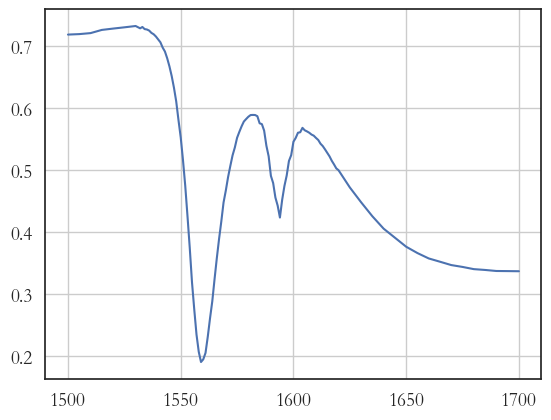

In [104]:
sub_df = main_df[main_df['S1_nm']==180]
sub_df_ref = main_df[main_df['S1_nm']==230]
plt.plot(sub_df['PumpWavelength_nm'],sub_df['LinearReflection'])
plt.grid()

[ 1.56126522e+03  1.08582248e+01  5.69057839e+00 -7.89705595e-02]
[0.33571545 1.33080593 0.72513026 0.01855015]


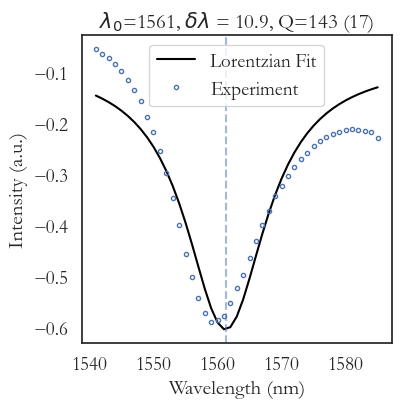

[ 1.59371414e+03  5.63802819e+00  9.50694754e-01 -2.07772764e-01]
[0.12253634 0.31487512 0.05418744 0.0025751 ]


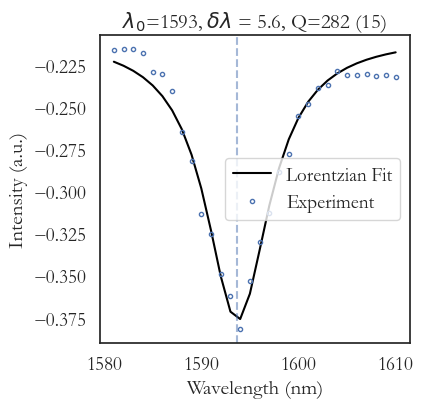

In [105]:
guess1=[1560,2.382,1.411,0.02]
lorentzian_fit(sub_df,sub_df_ref,guess1,1540,1585)
guess2=[1590,2,1.411,0.02]
lorentzian_fit(sub_df,sub_df_ref,guess2,1580,1610)

#### S1 = 170nm

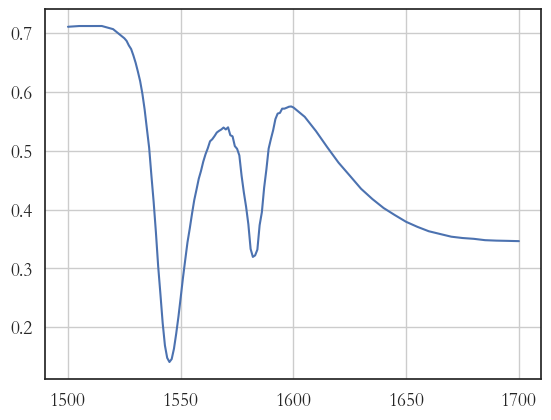

In [106]:
sub_df = main_df[main_df['S1_nm']==170]
sub_df_ref = main_df[main_df['S1_nm']==230]
plt.plot(sub_df['PumpWavelength_nm'],sub_df['LinearReflection'])
plt.grid()

[1.54753155e+03 1.75117230e+01 1.13658108e+01 5.09093445e-02]
[0.2257334  2.10129238 2.06631423 0.05174712]


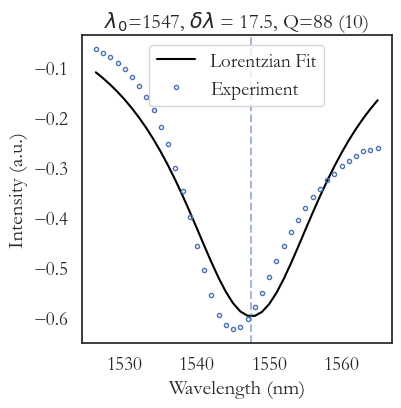

[ 1.58248135e+03  6.62815487e+00  1.85863389e+00 -2.13406363e-01]
[0.08286205 0.24097285 0.0698989  0.00304822]


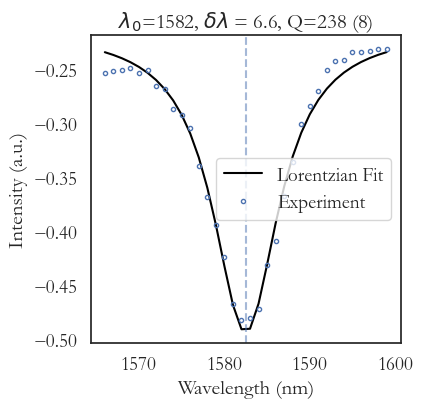

In [107]:
guess1=[1540,2.382,1.411,0.02]
lorentzian_fit(sub_df,sub_df_ref,guess1,1525,1565)
guess2=[1580,2,1.411,0.02]
lorentzian_fit(sub_df,sub_df_ref,guess2,1565,1600)

#### S1 = 160nm

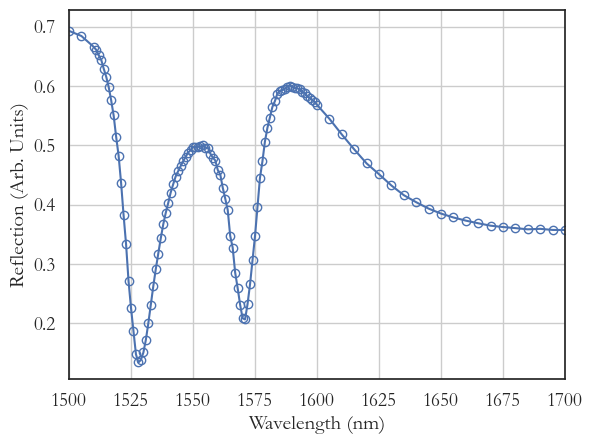

In [158]:
sub_df = main_df[main_df['S1_nm']==160]
sub_df_ref = main_df[main_df['S1_nm']==230]
plt.plot(sub_df['PumpWavelength_nm'],sub_df['LinearReflection'],'o-',fillstyle='none')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflection (Arb. Units)')
plt.xlim(1500,1700)
plt.grid()

[ 1.52974641e+03  1.32815545e+01  7.51470570e+00 -4.86773515e-02]
[0.12947182 2.77093881 3.03331809 0.11961589]


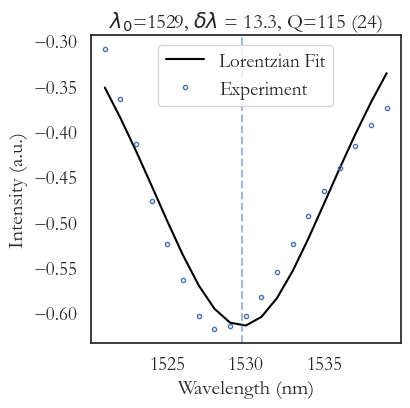

[ 1.56986431e+03  8.22744253e+00  3.20102111e+00 -2.01060366e-01]
[0.17366204 0.64397067 0.25810573 0.00883456]


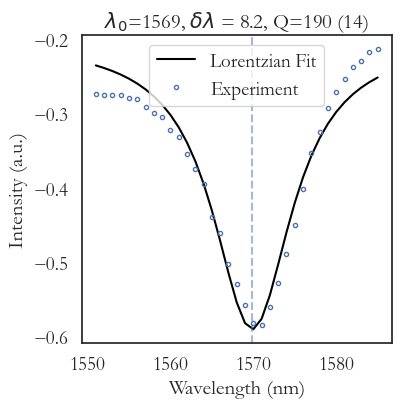

In [159]:
guess1=[1526,2.382,1.411,0.02]
lorentzian_fit(sub_df,sub_df_ref,guess1,1520,1540)
guess2=[1570,2,1.411,0.02]
lorentzian_fit(sub_df,sub_df_ref,guess2,1550,1585)

#### S1 = 150nm

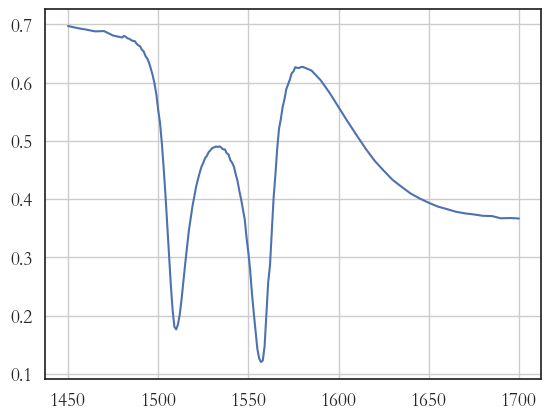

In [160]:
sub_df = main_df[main_df['S1_nm']==150]
sub_df_ref = main_df[main_df['S1_nm']==230]
plt.plot(sub_df['PumpWavelength_nm'],sub_df['LinearReflection'])
plt.grid()

[1.51136676e+03 1.79634857e+01 1.41906903e+01 2.42109035e-01]
[0.13146729 4.67112265 8.27913482 0.26303117]


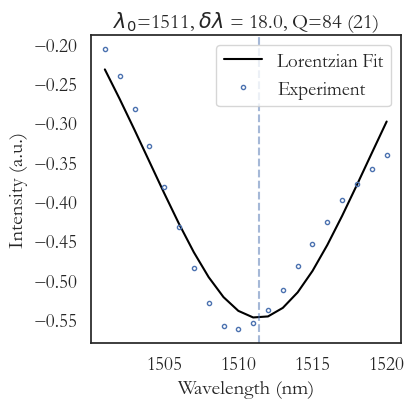

[ 1.55602347e+03  8.91021475e+00  4.28070749e+00 -1.97935088e-01]
[0.16725441 0.55183506 0.29093069 0.00987713]


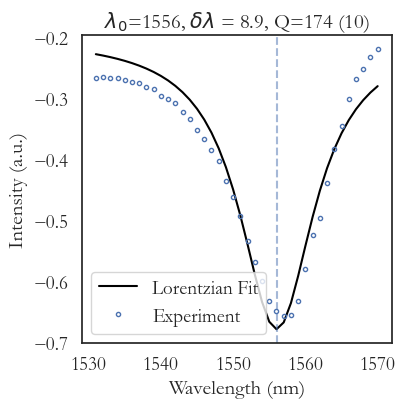

In [162]:
guess1=[1510,2.382,1.411,0.02]
lorentzian_fit(sub_df,sub_df_ref,guess1,1500,1520)
guess2=[1560,2,1.411,0.02]
lorentzian_fit(sub_df,sub_df_ref,guess2,1530,1570)

#### S1 = 140nm

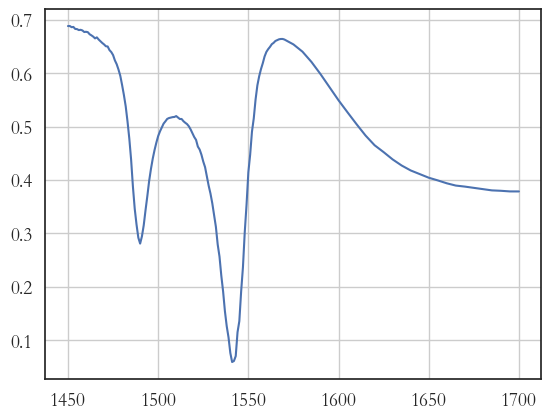

In [181]:
sub_df = main_df[main_df['S1_nm']==140]
sub_df_ref = main_df[main_df['S1_nm']==230]
plt.plot(sub_df['PumpWavelength_nm'],sub_df['LinearReflection'])
plt.grid()

[ 1.49082128e+03  6.24739402e+00  1.78507049e+00 -1.71229900e-01]
[0.25571135 0.78259811 0.22932961 0.01053128]


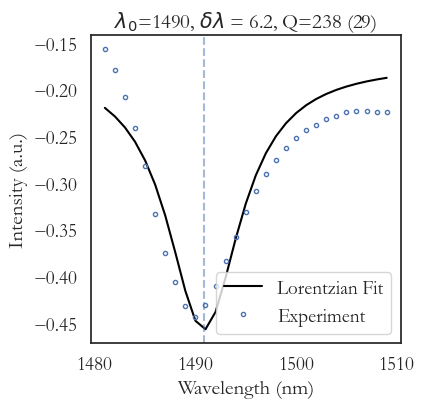

[ 1.53981803e+03  1.47720600e+01  9.46053933e+00 -5.35797391e-02]
[0.18012625 1.33092661 1.16328859 0.03151891]


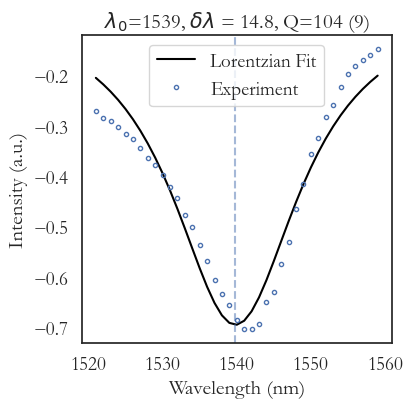

In [170]:
guess1=[1490,2.382,1.411,0.02]
lorentzian_fit(sub_df,sub_df_ref,guess1,1480,1510)
guess2=[1540,2,1.411,0.02]
lorentzian_fit(sub_df,sub_df_ref,guess2,1520,1560)

#### S1 = 130nm

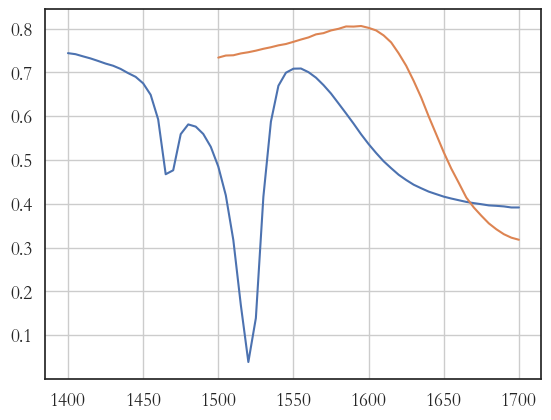

In [232]:
sub_df = main_df[main_df['S1_nm']==130]
sub_df_ref = main_df[main_df['S1_nm']==230]
plt.plot(sub_df['PumpWavelength_nm'],sub_df['LinearReflection'])
plt.plot(sub_df_ref['PumpWavelength_nm'],sub_df_ref['LinearReflection'])
plt.grid()

[1.46775679e+03 4.60822380e+00 1.08467092e+00 6.20878347e-01]
[0.724761   5.02124111 0.48760355 0.02303639]


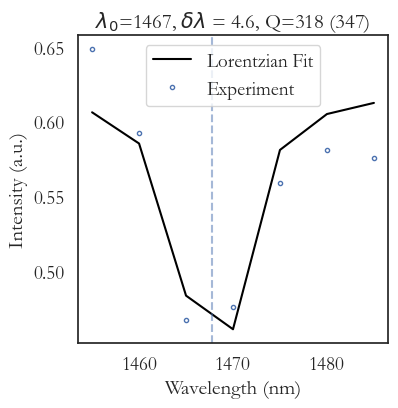

[1.51837434e+03 1.66786296e+01 1.16006467e+01 7.46087350e-01]
[0.62892016 3.12587272 2.42103221 0.04773073]


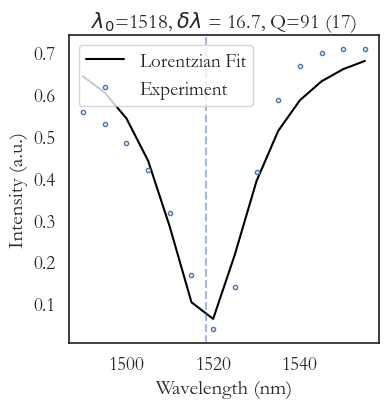

In [241]:
guess1=[1480,2.382,1.411,0.02]
lorentzian_fit(sub_df,sub_df_ref,guess1,1450,1490)
guess2=[1520,2,1.411,0.02]
lorentzian_fit(sub_df,sub_df_ref,guess2,1485,1560)

#### S1 = 120nm

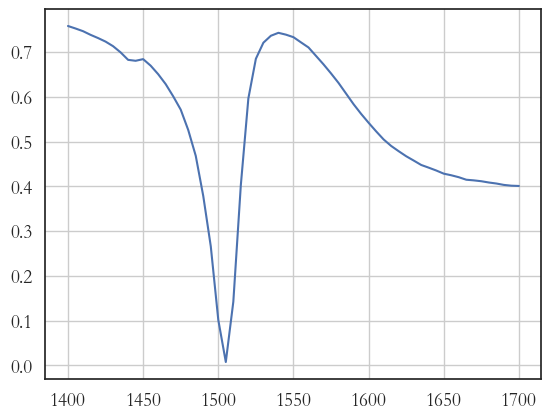

In [182]:
sub_df = main_df[main_df['S1_nm']==120]
sub_df_ref = main_df[main_df['S1_nm']==230]
plt.plot(sub_df['PumpWavelength_nm'],sub_df['LinearReflection'])
plt.grid()

[1.50288399e+03 1.69221893e+01 1.29503200e+01 3.63436955e-02]
[0.37454365 1.57492201 1.32924026 0.02568138]


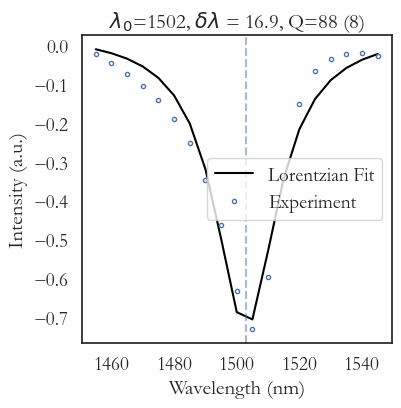

In [187]:
#guess1=[1490,2.382,1.411,0.02]
#lorentzian_fit(sub_df,sub_df_ref,guess1,1480,1510)
guess2=[1510,2,1.411,0.02]
lorentzian_fit(sub_df,sub_df_ref,guess2,1450,1550)

#### S1 = 110nm

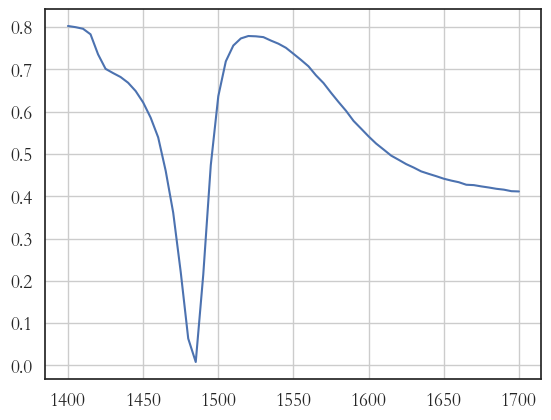

In [188]:
sub_df = main_df[main_df['S1_nm']==110]
sub_df_ref = main_df[main_df['S1_nm']==230]
plt.plot(sub_df['PumpWavelength_nm'],sub_df['LinearReflection'])
plt.grid()

[1.48165632e+03 1.69850933e+01 1.36019015e+01 8.29846827e-02]
[0.29197558 0.98460361 0.90463986 0.01661941]


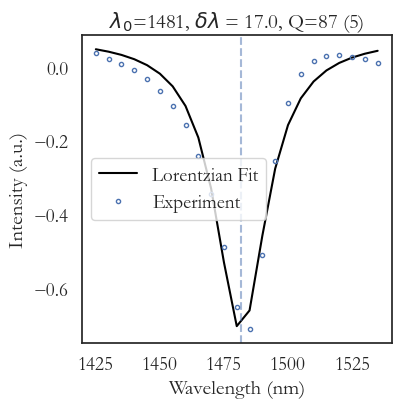

In [191]:
guess2=[1490,2,1.411,0.02]
lorentzian_fit(sub_df,sub_df_ref,guess2,1420,1540)

#### S1 = 100nm

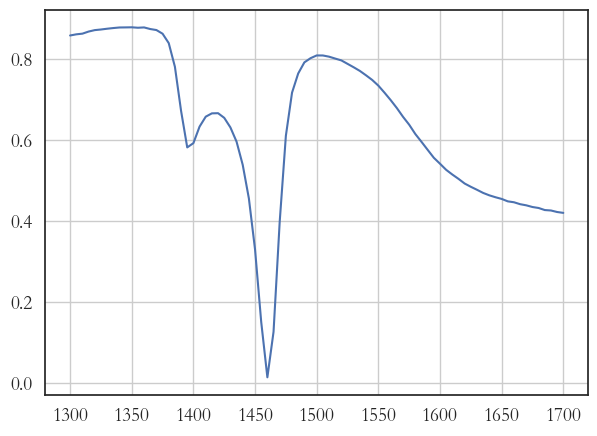

In [432]:
sub_df = main_df[main_df['S1_nm']==100]
sub_df_ref = main_df[main_df['S1_nm']==230]
plt.plot(sub_df['PumpWavelength_nm'],sub_df['LinearReflection'])
plt.grid()

[1399.64326928  107.64707077  550.47350131    5.69826036]
[0. 0. 0. 0.]


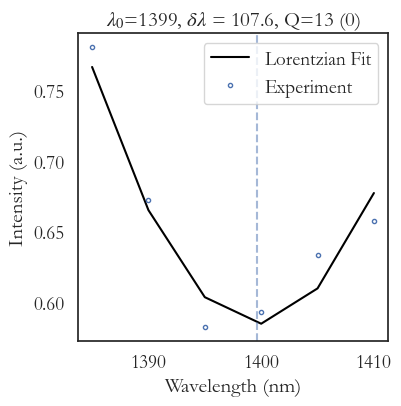

[1.45897685e+03 1.46127359e+01 1.15427988e+01 7.82336013e-01]
[0.53813627 3.2110144  2.62729592 0.0587043 ]


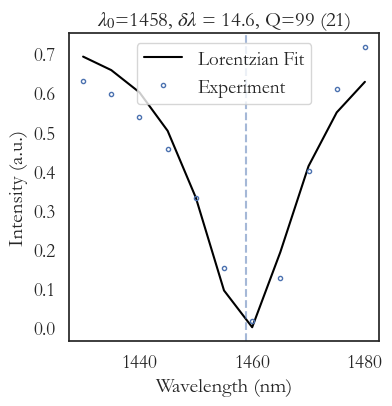

In [436]:
guess1=[1390,2,1.411,0.02]
lorentzian_fit(sub_df,sub_df_ref,guess1,1380,1410)
guess2=[1460,2,1.411,0.02]
lorentzian_fit(sub_df,sub_df_ref,guess2,1425,1480)

#### S1 = 50nm

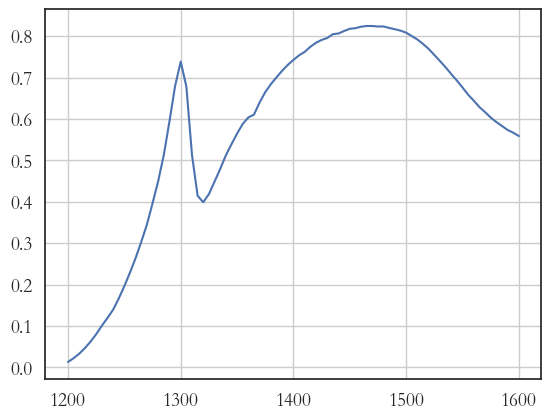

In [270]:
sub_df = main_df[main_df['S1_nm']==50]
sub_df_ref = main_df[main_df['S1_nm']==230]
plt.plot(sub_df['PumpWavelength_nm'],sub_df['LinearReflection'])
plt.grid()

[1327.84549521  217.63450644 2181.4225827    10.43136297]
[0. 0. 0. 0.]


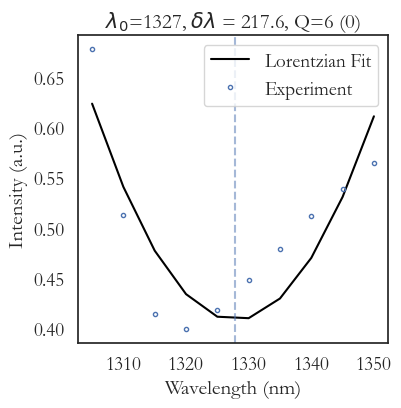

In [271]:
guess2=[1320,2,1.411,0.02]
lorentzian_fit(sub_df,sub_df_ref,guess2,1300,1350)

### Enhancement

[0.060031]


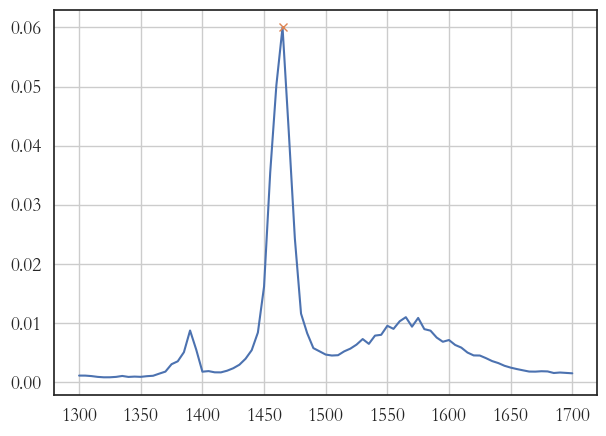

In [440]:
from scipy.signal import find_peaks


sub_df = main_df[main_df['S1_nm']==100]
relE = np.array(sub_df['RFE_THG'])
peaks,_ = find_peaks(relE,height=0.5*max(relE))
plt.plot(sub_df['PumpWavelength_nm'],relE)
plt.plot(sub_df['PumpWavelength_nm'].iloc[peaks],relE[peaks],'x')
plt.grid()
print(relE[peaks])

0 [1.76957675e-08 1.12468139e-08]


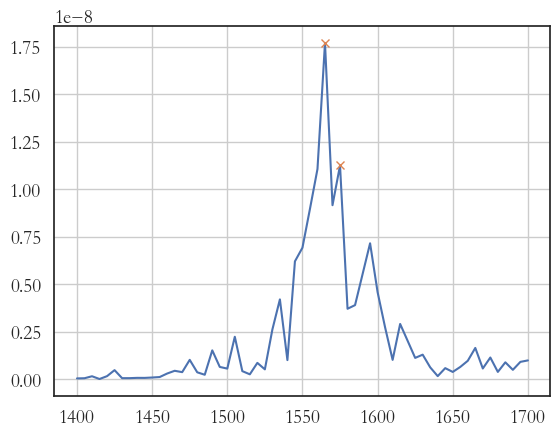

50 [1.48665618e-08 1.73168257e-08 2.21353049e-08]


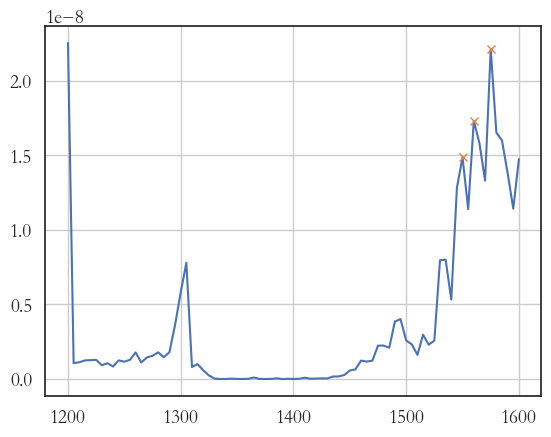

110 [4.45244248e-06]


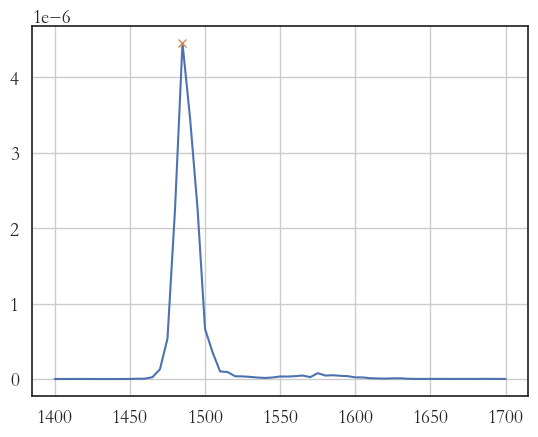

120 [5.97548477e-06]


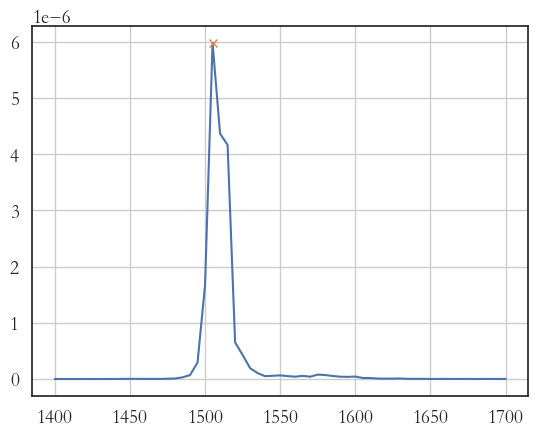

130 [9.88344716e-07]


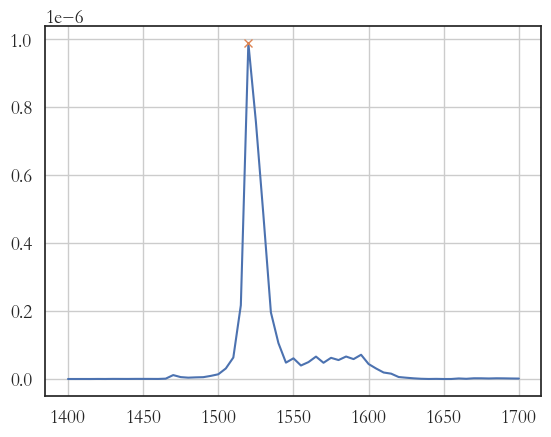

140 [4.54703034e-07 6.55680461e-07 6.03870253e-07 5.21748919e-07
 6.32705029e-07]


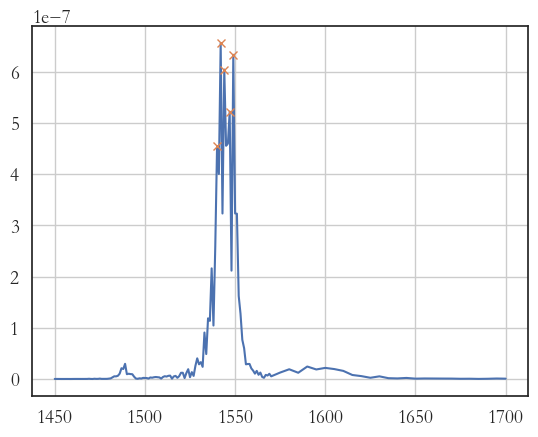

150 [5.22413652e-07]


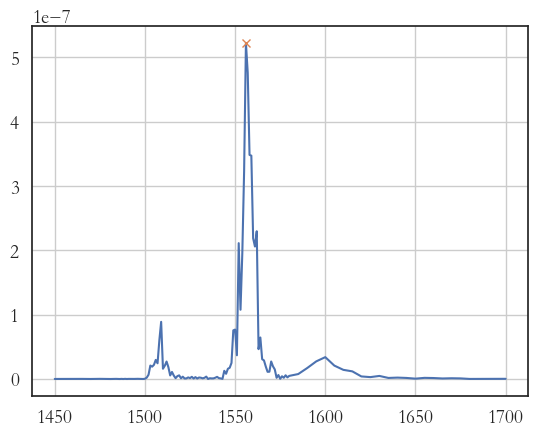

160 [1.18050133e-07 1.50512564e-07 1.66825225e-07 1.46281819e-07
 1.98606450e-07 1.34658652e-07]


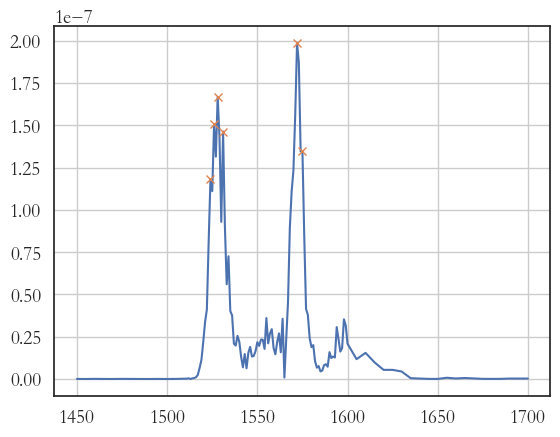

170 [1.33229412e-07 1.63181478e-07 1.22387169e-07 1.03745783e-07
 9.05340025e-08 8.83505326e-08 9.09066165e-08 1.12719657e-07]


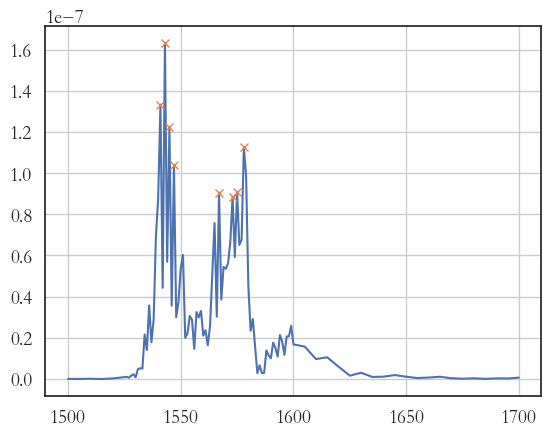

180 [9.97676957e-08 5.58171205e-08 5.70014293e-08 5.77083048e-08
 8.17717286e-08 7.77558567e-08 8.23976851e-08]


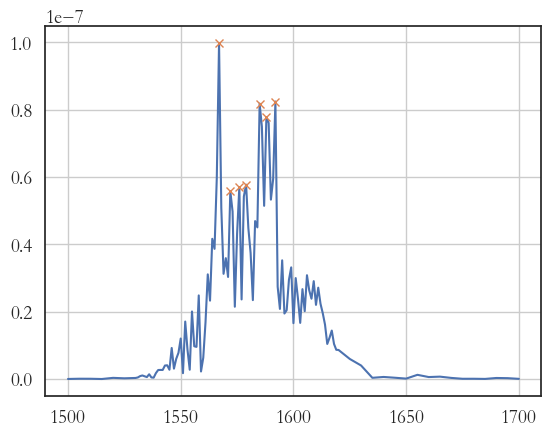

190 [4.69404731e-08 4.22101123e-08 4.81281731e-08 6.92691110e-08
 7.39361619e-08 7.49395140e-08 8.35599809e-08 8.07517644e-08
 6.72715523e-08 6.97232478e-08]


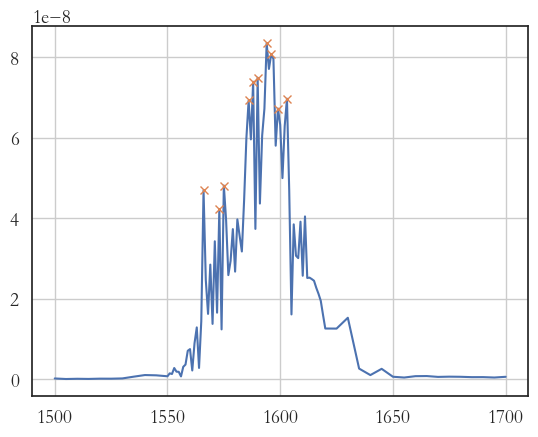

200 [3.23134124e-08 3.97138650e-08 4.20440153e-08 5.60760060e-08
 6.02508976e-08 5.71370851e-08 4.15953393e-08 4.63715061e-08
 4.77720831e-08 3.08820689e-08 3.31515482e-08]


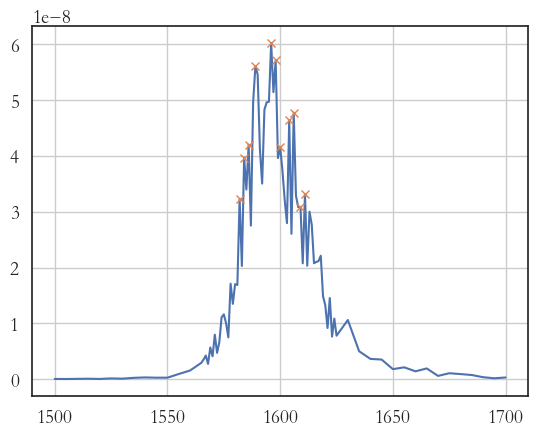

210 [2.47185828e-08 2.90971362e-08 3.71289959e-08 2.36403831e-08
 3.89668747e-08 3.47966771e-08 2.19333626e-08]


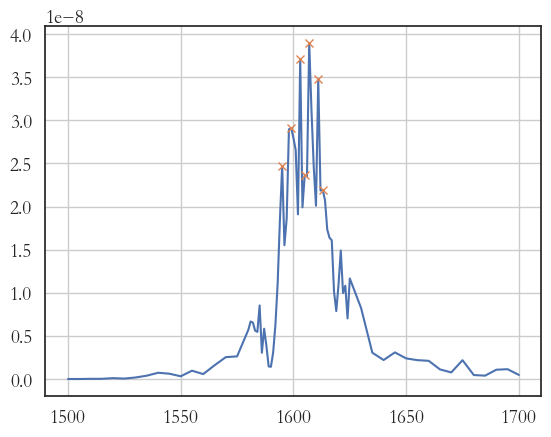

220 [1.64403760e-08 2.69267876e-08 2.84749609e-08 2.94260320e-08
 3.12958558e-08 2.85746123e-08 2.36064682e-08 2.39914262e-08
 2.32730010e-08]


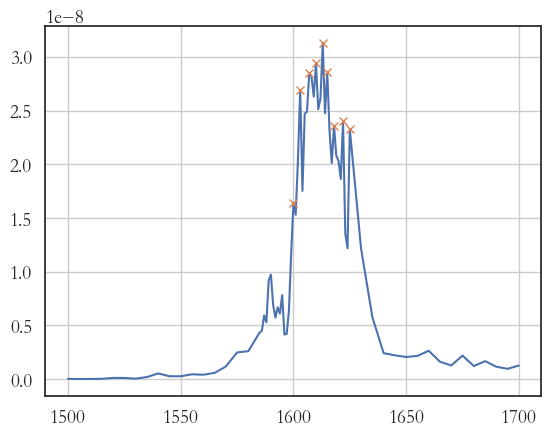

230 [2.46354019e-08 2.35508855e-08]


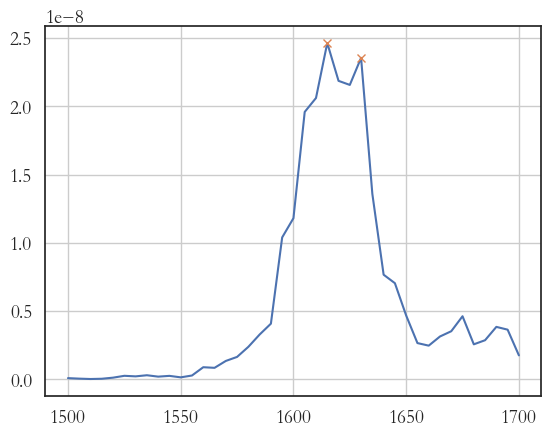

999 [5.98206978e-10]


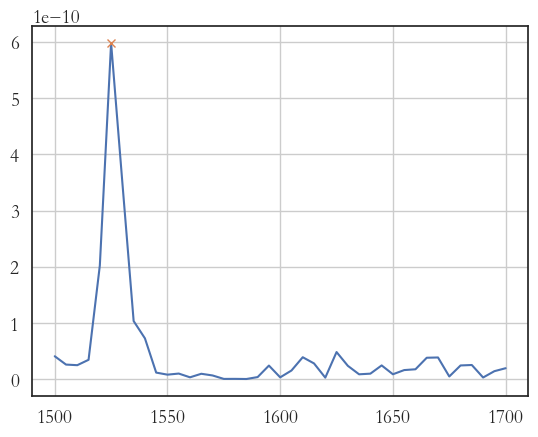

In [275]:
for i in S1_list:
    sub_df = main_df[main_df['S1_nm']==i]
    relE = np.array(sub_df['THG_Backward'])
    peaks,_ = find_peaks(relE,height=0.5*max(relE))
    plt.plot(sub_df['PumpWavelength_nm'],relE)
    plt.plot(sub_df['PumpWavelength_nm'].iloc[peaks],relE[peaks],'x')
    plt.grid()
    print(i,relE[peaks])
    plt.show()

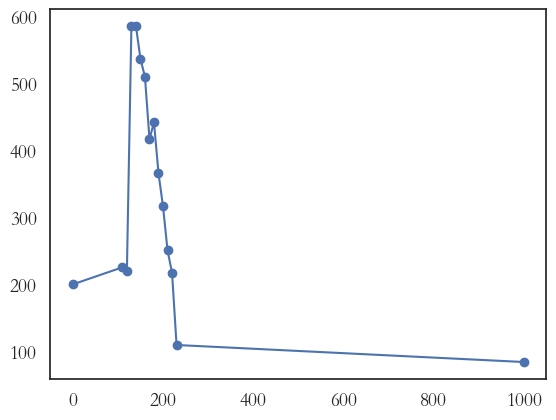

In [211]:
integ_int=[]
for i in S1_list:
    sub_df = main_df[main_df['S1_nm']==i]
    relE = np.array(sub_df['RFE_Pump'])
    integ_int.append(np.sum(relE))
plt.plot(S1_list,integ_int,'o-')

### Q-factor Analysis

In [5]:
results = pd.read_excel('../COMSOL Simulation - THG SiMS/240228-AsymmetrySweep_Qnr=150/240301 - Loss=150 Results.xlsx',index_col=None)
modeResults = pd.read_excel('../COMSOL Simulation - THG SiMS/240312-ModeAnalysis/240313-ModeAnalysis-Results-Fullfield-Dispersionless.xlsx',index_col=None)
results=results.iloc[4:14]
results

,S2,S1,dS,Asymmetry,Peak1,Linewidth1,Q-factor1,Qf1-err,Peak2,Linewidth2,...,Qf2-err,THGF1,THGF2,THGB1,THGB2,FE1_Pump,FE2_pump,FE1_THG,FE2_THG,E0
4,230,190,40,0.173913,1573,12.1,130,13,1604,5.0,...,73,1.927008e-07,5.000000e-08,4.812817e-08,8.355998e-08,4.9171,4.9493,0.016041,0.009561,86802000
5,230,180,50,0.217391,1561,10.9,143,17,1593,5.6,...,15,1.732776e-07,6.000000e-08,9.976770e-08,8.177173e-08,5.2950,5.3664,0.020312,0.013966,86802000
6,230,170,60,0.260870,1547,17.5,88,10,1582,6.6,...,8,2.439492e-07,2.483672e-07,1.631815e-07,1.127197e-07,5.5474,5.4569,0.025185,0.028132,86802000
7,230,160,70,0.304348,1529,13.3,115,24,1569,8.2,...,14,4.000000e-07,1.476429e-06,1.668252e-07,1.986064e-07,5.5415,5.6925,0.026912,0.042898,86802000
8,230,150,80,0.347826,1511,18.0,84,21,1556,8.9,...,10,3.000000e-07,2.831846e-06,1.000000e-07,5.224137e-07,5.5000,5.8528,0.027299,0.049042,86802000
9,230,140,90,0.391304,1490,6.2,238,29,1539,14.8,...,9,0.000000e+00,9.144602e-06,0.000000e+00,6.556805e-07,4.9542,5.6600,0.020000,0.064508,86802000
10,230,130,100,0.434783,1467,4.6,318,347,1518,18.5,...,17,0.000000e+00,9.555098e-06,0.000000e+00,9.883447e-07,4.0000,6.0600,0.010000,0.056493,86802000
11,230,120,110,0.478261,0,0.0,0,0,1502,16.9,...,8,0.000000e+00,1.365104e-05,0.000000e+00,9.754848e-07,3.2000,6.0075,0.000000,0.052614,86802000
12,230,110,120,0.521739,0,0.0,0,0,1481,17.0,...,5,0.000000e+00,1.208800e-05,0.000000e+00,4.452442e-06,3.1500,6.3593,0.000000,0.060630,86802000
13,230,100,130,0.565217,1399,107.6,13,0,1458,14.6,...,21,0.000000e+00,7.351574e-06,0.000000e+00,3.997903e-06,3.1000,6.8329,0.010000,0.060031,86802000


In [42]:
modeResults

,S1_nm,Freq_THz_SF,Damp _THz_SF,Q-factor_SF,Mode_nm_SF,Damp_nm_SF,Peak_FD,Linewidth_FD,Q-factor_FD,Q-F-err_FD,S1_nm_2,Asy,Mode_THz_FF,Damp_THz_FF,Q-factor_FF,Mode_nm_FF,Damp_nm_FF
0,100.0,205.65,1.57290,65.372878,1457.780005,11.149508,1458.0,14.6,49.931507,21.0,100,0.565217,205.70,1.60550,64.061040,1457.425659,11.375061
1,110.0,202.32,1.59200,63.542714,1481.773715,11.659433,1481.0,17.0,43.558824,5.0,110,0.521739,202.35,1.66000,60.948795,1481.554030,12.153845
2,120.0,199.34,1.50250,66.336106,1503.925243,11.335419,1502.0,16.9,44.437870,8.0,120,0.478261,199.30,1.57030,63.459212,1504.227085,11.851683
3,130.0,196.76,1.33070,73.931014,1523.645345,10.304301,1518.0,18.5,41.027027,17.0,130,0.434783,196.70,1.37450,71.553292,1524.110107,10.649961
4,140.0,194.53,1.14770,84.747756,1541.111695,9.092163,1539.0,14.8,51.993243,9.0,140,0.391304,194.47,1.16770,83.270532,1541.587175,9.256314
5,150.0,192.61,0.97614,98.659004,1556.474004,7.887992,1556.0,8.9,87.415730,10.0,150,0.347826,192.58,0.98167,98.087952,1556.716471,7.935150
6,160.0,190.97,0.83178,114.795980,1569.840593,6.837387,1569.0,8.2,95.670732,14.0,160,0.304348,190.96,0.82922,115.144353,1569.922801,6.817058
7,170.0,189.54,0.72169,131.316770,1581.684383,6.022280,1582.0,6.6,119.848485,8.0,170,0.260870,189.51,0.71694,132.165872,1581.934769,5.984537
8,180.0,188.27,0.64071,146.922945,1592.353843,5.418902,1593.0,5.6,142.232143,NaN,180,0.217391,188.26,0.63841,147.444432,1592.438426,5.400023
9,190.0,187.14,0.58609,159.651248,1601.968890,5.016988,1604.0,5.0,160.400000,NaN,190,0.173913,187.13,0.58449,160.079728,1602.054497,5.003827


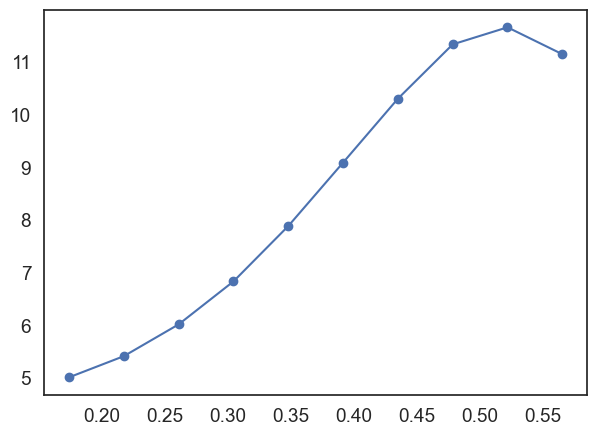

In [47]:
plt.plot(modeResults['Asy'],modeResults['Damp_nm_SF'],'o-')

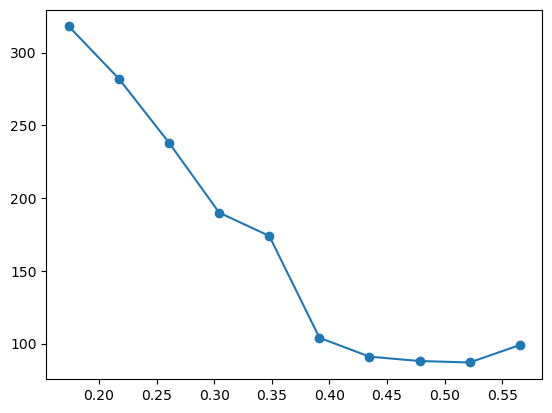

In [6]:
plt.plot(results['Asymmetry'], results['Q-factor2'],'o-')


In [7]:
def Qtot(alpha,Q0,Qnr):
    alpha_opt=np.sqrt(Q0/Qnr)
    return Qnr/((alpha**2 / alpha_opt**2) + 1) 

def Qtot2(alpha,Qnr):
    # alpha_opt=np.sqrt(Q0/Qnr)
    alpha_opt = 0.45
    return Qnr/((alpha**2 / alpha_opt**2) + 1) 

def THG_enhancement(alpha,Q0,Qnr):
    alpha_opt=np.sqrt(Q0/Qnr)
    alpha_p = alpha**2 / alpha_opt**2
    return Qnr**3 * (alpha_p/(alpha_p+1)**2)**3

In [10]:
asy_range = np.linspace(0.05,0.45)

I0=1e13 
E0=np.sqrt(2*I0/(c*epsilon_0))

THG_nonlinearity = results['FE2_THG']/E0**2
THG_nonlinearity2 = THG_nonlinearity/max(THG_nonlinearity)
THG_conv_eff = results['FE2_THG']**2/max(results['FE2_THG']**2)

I_THG = 0.5*c*epsilon_0*(results['FE2_THG']*E0)**2
#TSFG_efficiency1 = I_THG/I0**2
TSFG_efficiency_F = results['THGF2'] /I0**2
TSFG_efficiency_B = results['THGB2'] /I0**2

In [33]:
# General calculation of TOSPDC Rate

# Wavelength parameters
# lp = 500.3e-9 # 520nm
# l1 = 3*lp # 1560nm
l1 = (-501.1613232*results['Asymmetry'] + 1616.564)*1e-9
lp = l1/3
lw = 4e-9 # 50nm # Laser or detection bandwidth?
spectral_lw = 4/3 * (2*pi*c*lw/(l1**2))**2 # s^-2

# Geometric parameters
meta_area = ((1-results['Asymmetry'])*230e-9+230e-9)*570e-9 # m^2
unit_cell = 680e-9**2 #m^2
beam_spot = pi*(5e-6)**2 # m^2

# THG Simulation Results

spdc_pump_flux = 12e13  # 1e13 W/m^2 = 1 GW/cm^2
TSFG_efficiency_f = 3e-31*meta_area # m^2 / (W/m^2)^2 (the same for all pump power)

TOPDC_F = hbar*c/(2*pi) * lp**4/(l1**9) * spectral_lw * 4*pi**2 * TSFG_efficiency_F * spdc_pump_flux * beam_spot
TOPDC_B = hbar*c/(2*pi) * lp**4/(l1**9) * spectral_lw * 4*pi**2 * TSFG_efficiency_B * spdc_pump_flux * beam_spot

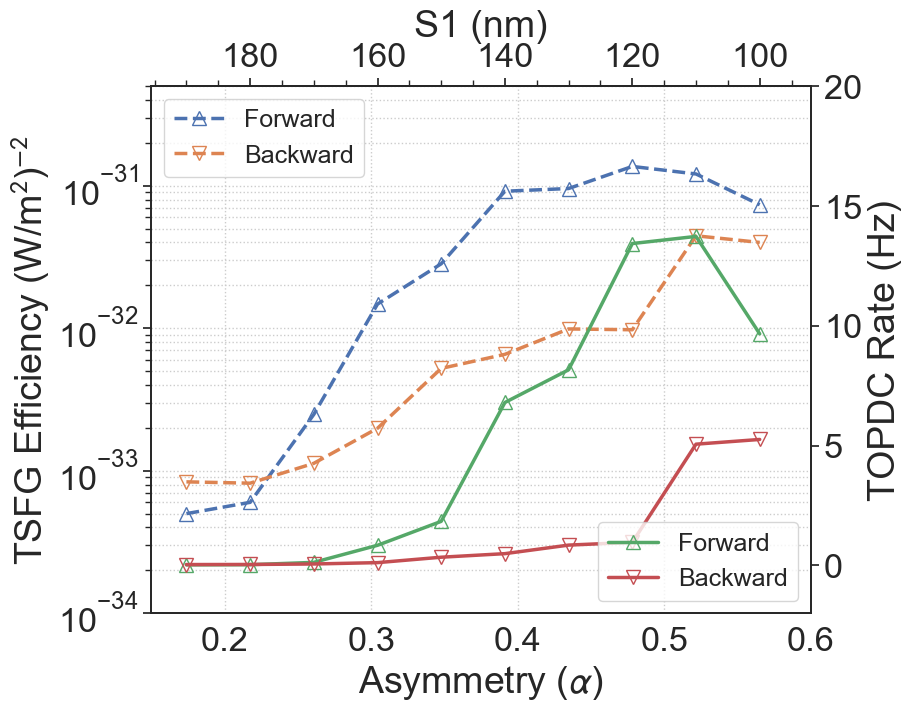

In [38]:
sns.set(font_scale=2.25,style='white', palette='deep',font='Arial',rc = {'figure.figsize':(9,5)})

fig, ax = plt.subplots(layout='constrained',figsize=(9,7))
plt.semilogy(results['Asymmetry'],TSFG_efficiency_F,'^--',label='Forward',fillstyle='none',linewidth=2.5,markersize=10)
plt.semilogy(results['Asymmetry'],TSFG_efficiency_B,'v--',label='Backward',fillstyle='none',linewidth=2.5,markersize=10)
plt.xlabel(r'Asymmetry ($\alpha$)')
plt.ylabel(r'TSFG Efficiency (W/m$^2$)$^{-2}$')
plt.legend(loc=2,fontsize=18)
plt.grid(True, which="both", ls=':')
#plt.xlim(min(results['Asymmetry'])-0.01,max(results['Asymmetry'])+0.01)
plt.xlim(0.15,0.6)
plt.ylim(1e-34,5e-31)
#plt.savefig('TSFG_Efficiency',dpi=200,bbox_inches='tight')
#plt.axvline(0.45)
#plt.axhline(3.5e-31)

def asytoS1(asy):
    return 230-(asy*230)

def S1toasy(S1):
    return (230-S1)/230

secax = ax.secondary_xaxis('top', functions=(asytoS1, S1toasy))
secax.xaxis.set_minor_locator(AutoMinorLocator())
secax.set_xlabel(r'S1 (nm)')


ax2 = ax.twinx()
#ax2.plot(asy_range,THG_enhancement(asy_range,Q0,Qnr)/max(THG_enhancement(asy_range,Q0,Qnr)),color='C1',linewidth=1.5)
ax2.plot(results['Asymmetry'],TOPDC_F,marker='^',linestyle='-',fillstyle='none',color='C2',label='Forward',linewidth=2.5,markersize=10)
ax2.plot(results['Asymmetry'],TOPDC_B,marker='v',linestyle='-',fillstyle='none',color='C3',label='Backward',linewidth=2.5,markersize=10)
# ax2.arrow(0.55,THG_enhancement(0.55,Q0,Qnr)/max(THG_enhancement(asy_range,Q0,Qnr)),0.085,0.0,color='C1',width=0.002,head_width=0.025,head_length=0.01)
#ax2.plot(np.sqrt(Q0/Qnr),THG_enhancement(np.sqrt(Q0/Qnr),Q0,Qnr),marker='o',markersize=8,color='k',fillstyle='none')
ax2.set_ylim([-2,20])
ax2.set_ylabel('TOPDC Rate (Hz)')
ax2.legend(loc=4,fontsize=18)

In [169]:
l1,results['Asymmetry']

(4     0.000002
 5     0.000002
 6     0.000001
 7     0.000001
 8     0.000001
 9     0.000001
 10    0.000001
 11    0.000001
 12    0.000001
 13    0.000001
 Name: Asymmetry, dtype: float64,
 4     0.173913
 5     0.217391
 6     0.260870
 7     0.304348
 8     0.347826
 9     0.391304
 10    0.434783
 11    0.478261
 12    0.521739
 13    0.565217
 Name: Asymmetry, dtype: float64)

[-501.1613232  1616.46367962]


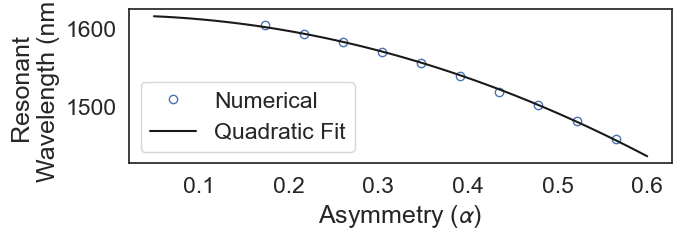

In [42]:
from scipy.optimize import curve_fit
asy_range = np.linspace(0.05,0.6)
def quad(x,a,b):
    return a*x**2 + b
sns.set(font_scale=1.5,style='white', palette='deep',font='Arial')#,rc = {'figure.figsize':(9,5)})
popt, pcov = curve_fit(quad, results['Asymmetry'], results['Peak2'])
plt.figure(figsize=(7,2))
plt.plot(results['Asymmetry'],results['Peak2'],'o',fillstyle='none',label='Numerical')
plt.plot(asy_range,quad(asy_range,*popt),'k-',label='Quadratic Fit')
plt.legend(loc=3)
plt.xlabel(r'Asymmetry ($\alpha$)')
plt.ylabel('Resonant\nWavelength (nm)')
#plt.xlim(0.1,0.41)
print(popt)

In [119]:
from scipy.optimize import leastsq
errfunc2 = lambda p,x,y: np.abs(Qtot2(x,*p)-y)**2
errfunc3 = lambda p,x,y: np.abs(THG_enhancement(x,*p)-y)**2
guess=[8,2000]
guess1=[400]
optim1, success,infodict,mesg,ier = leastsq(errfunc2, guess1[:], args=(results['Asymmetry'], results['Q-factor2']/2),full_output=True)
optim2, success,infodict,mesg,ier = leastsq(errfunc3, guess[:], args=(results['Asymmetry'], results['FE2_THG']),full_output=True)

In [120]:
# calculate optimal asymmetry from FE2_THG fitting
aa=np.sqrt(optim2[0]/optim2[1])
print(aa)

0.4498435810860461


In [121]:
optim1, optim2

(array([145.53616543]), array([0.31951756, 1.57896201]))

In [109]:
optim1

array([145.53616543])

In [122]:
145.5*aa**2

29.443270503148288

In [111]:
np.sqrt(29/200)

0.3807886552931954

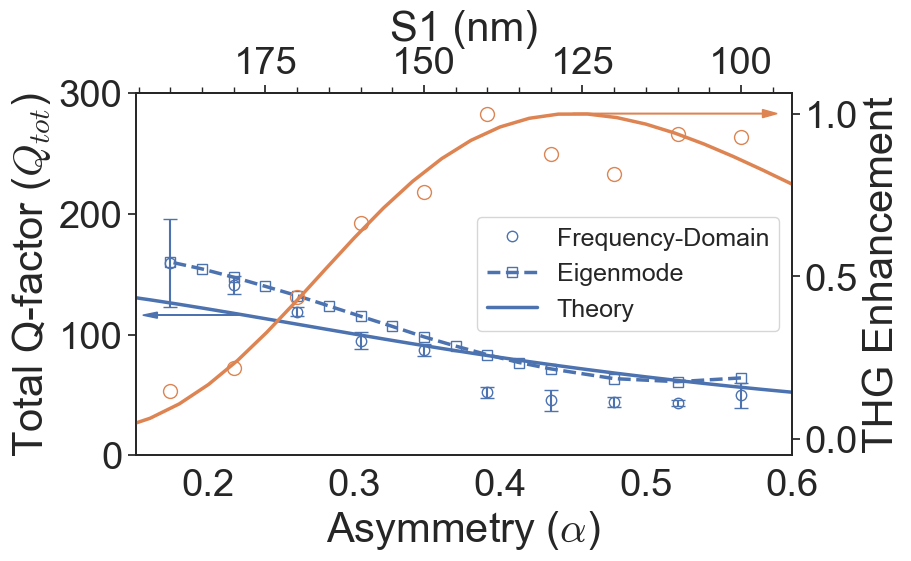

In [165]:
Q0=29.4
Qnr=145
asy_range = np.linspace(0.02,1)

from matplotlib.ticker import AutoMinorLocator
#matplotlib.rcParams['mathtext.fontset'] = 'cm'
sns.set(font_scale=2.5,style='white', palette='deep',font='Arial',rc = {'figure.figsize':(9,5)})

fig, ax = plt.subplots(layout='constrained',figsize=(9,5.5))
#plt.figure(figsize=(7,5))
#plt.axhspan(optim[0]/2-100,optim[0]/2+100 ,color='C2',alpha=0.2)
#plt.axhline(optim[0]/2,color='C2',linestyle=':',alpha=0.8,label=r'$Q_{rad}=Q_{par}$')
#plt.axvline(np.sqrt(Q0/Qnr),linestyle=':',color='k',label=r'$\alpha_{opt}$=%0.2f' %(np.sqrt(Q0/Qnr)))
plt.plot(results['Asymmetry'],results['Q-factor2']/2,'o',label='Frequency-Domain',color='C0',fillstyle='none',linewidth=2.5,markersize=7.5)
plt.errorbar(results['Asymmetry'],results['Q-factor2']/2,results['Qf2-err']/2,fmt='none',capsize=5,color='C0',fillstyle='none')
plt.plot(modeResults['Asy'].iloc[:-5],modeResults['Q-factor_FF'].iloc[:-5],'s--',color='C0',label='Eigenmode',fillstyle='none',markersize=7.5,linewidth=2.5)
plt.plot(asy_range,Qtot(asy_range,Q0,Qnr),label='Theory',color='C0',linewidth=2.5)
plt.arrow(0.225,Qtot(0.225,Q0,Qnr),-0.07,0,color='C0',length_includes_head=True,width=0.002,head_width=5,head_length=0.01)
plt.legend(loc=5,fontsize=18)
ax.set_xlabel(r'Asymmetry ($\alpha$)')
ax.set_ylabel(r'Total Q-factor ($Q_{tot}$)')
plt.xlim(0.15,0.6)
plt.ylim(0,300)
#plt.grid()


def asytoS1(asy):
    return 230-(asy*230)

def S1toasy(S1):
    return (230-S1)/230

secax = ax.secondary_xaxis('top', functions=(asytoS1, S1toasy))
secax.xaxis.set_minor_locator(AutoMinorLocator())
secax.set_xlabel(r'S1 (nm)')

ax2 = ax.twinx()
ax2.plot(asy_range,THG_enhancement(asy_range,Q0,Qnr)/max(THG_enhancement(asy_range,Q0,Qnr)),color='C1',linewidth=2.5)
ax2.plot(results['Asymmetry'],results['FE2_THG']/max(results['FE2_THG']),marker='o',linestyle='none',fillstyle='none',color='C1',markersize=10)
ax2.arrow(0.45,THG_enhancement(0.45,Q0,Qnr)/max(THG_enhancement(asy_range,Q0,Qnr)),0.13,0.0,color='C1',width=0.002,head_width=0.025,head_length=0.01)
#ax2.plot(np.sqrt(Q0/Qnr),THG_enhancement(np.sqrt(Q0/Qnr),Q0,Qnr),marker='o',markersize=8,color='k',fillstyle='none')
#ax2.set_ylim([0.5e7,0.3e9])
ax2.set_ylabel('THG Enhancement')
plt.show()

#plt.savefig('Q-Factor_Results_Qnr=150.png',dpi=200,bbox_inches='tight')

In [70]:
np.sort(modeResults['Asy'])

array([0.06521739, 0.08695652, 0.10869565, 0.13043478, 0.13043478,
       0.15217391, 0.17391304, 0.17391304, 0.19565217, 0.2173913 ,
       0.2173913 , 0.23913043, 0.26086957, 0.26086957, 0.2826087 ,
       0.30434783, 0.30434783, 0.32608696, 0.34782609, 0.34782609,
       0.36956522, 0.39130435, 0.39130435, 0.41304348, 0.43478261,
       0.47826087, 0.52173913, 0.56521739])